In [1]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [2]:
from utils.analysis.feyn import model_path, model_name
model_dir = model_path.split('/')[-3]
model_savein = f'plots/feynnet/{model_name}'
combine_save = f'combine/feynnet/{model_name}'
model_savein

'plots/feynnet/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg'

In [3]:
from configparser import ConfigParser
cfg = 'config/bdt_params.cfg'
config = ConfigParser()
config.optionxform = str
config.read(cfg)
# print(config['spherical']['nregions'])
if config['spherical']['nregions'] == 'multiple': model_savein = f"{model_savein}/multiple_bdt_regions"
elif config['spherical']['nregions'] == 'diagonal': model_savein = f"{model_savein}/diagonal"
elif config['spherical']['nregions'] == 'concentric': model_savein = f"{model_savein}/concentric"
model_savein.split('/')[-1]

'concentric'

In [4]:
import os
if not os.path.exists(model_savein): os.makedirs(model_savein)
if not os.path.exists(model_savein + '/root_files'): os.makedirs(model_savein + '/root_files')

In [5]:
import pyhf
pyhf.set_backend("jax")
import uproot as up

# Data Training

In [6]:
data = Data('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/JetHT_Data_UL/ntuple.root')

ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/JetHT_Data_UL/ntuple.root
model: /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/JetHT_Data_UL.root


In [7]:
data.spherical_region()
data.train()

REGION: concentric
high avg b tag score threshold = 0.65
.. training in validation region
.. training in analysis region


## Signal Region

[ 0.96258232  5.17410129 19.16132987 36.63857926 57.30064217 63.8508375
 66.07022858 66.60607165 57.3615174  49.31922039 37.7091014  32.95562592
 25.76286254 22.62901175 23.72525296 11.95855066 11.44338986  8.54131284
  6.17494973  2.96837042  1.81288384  2.3128962   1.30472394  0.62299195
  0.          0.83478419  0.29603344  0.          0.          0.32996379]


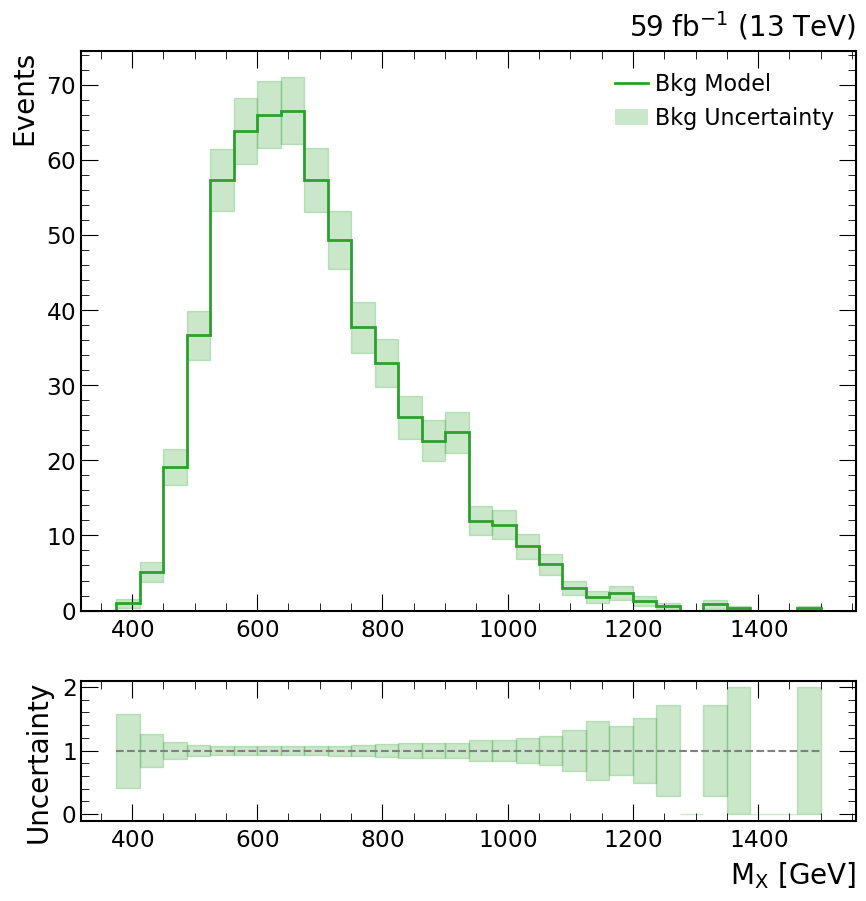

In [22]:
# fig, ax, n_4b_model = data.sr_hist(savein=f"{model_savein}/data_asr_model.root")
fig, ax, n_4b_model = data.sr_hist()
print(n_4b_model)
ax[0].set_title(r'59 fb$^{-1}$ (13 TeV)')
fig.savefig(f'{model_savein}/sr_model.pdf')

In [8]:
tree1 = SixB(get_NMSSM(400,250))
tree2 = SixB(get_NMSSM(450,250))
tree3 = SixB(get_NMSSM(450,300))

tree1.spherical_region()
tree2.spherical_region()
tree3.spherical_region()

ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-400_MY-250_TuneCP5_13TeV-madgraph-pythia8/ntuple.root


model: /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMSSM_XToYHTo6B_MX-400_MY-250_TuneCP5_13TeV-madgraph-pythia8.root
ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-450_MY-250_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
model: /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMSSM_XToYHTo6B_MX-450_MY-250_TuneCP5_13TeV-madgraph-pythia8.root
ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-450_MY-300_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
model: /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_

plots/feynnet/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/concentric/sr_model_w_sig_low.pdf


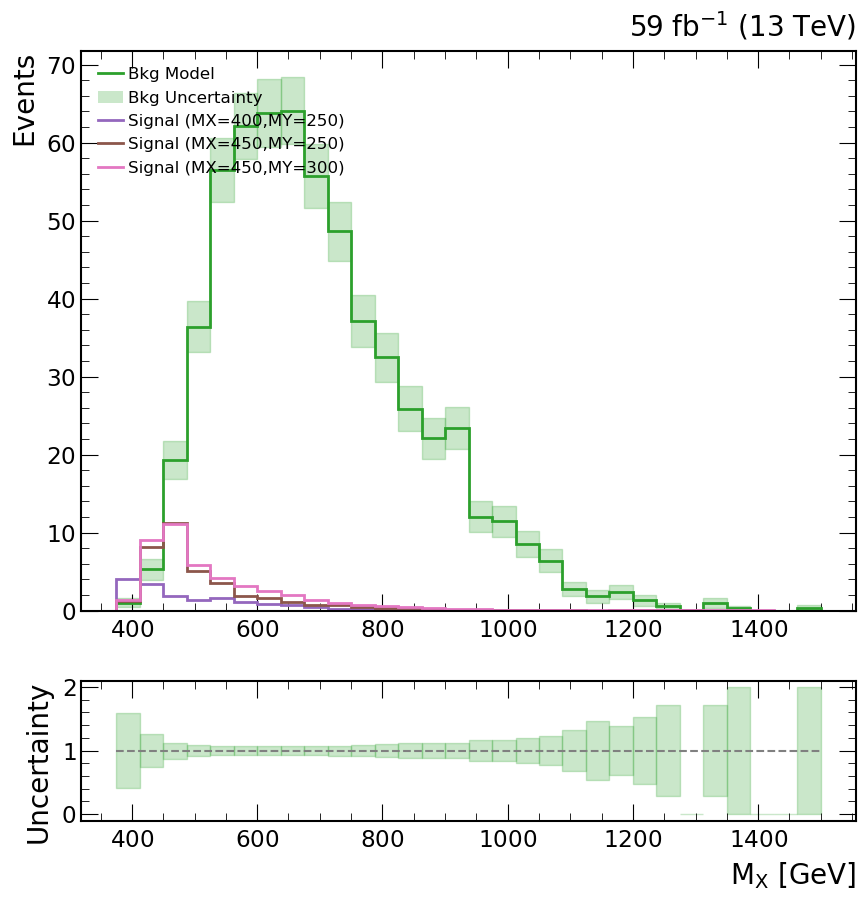

In [10]:
fig, ax, n_4b_model = data.sr_hist()
Hist(tree1.X.m[tree1.asr_hs_mask], bins=data.mBins, weights=tree1.nomWeight[tree1.asr_hs_mask], ax=ax[0], color='C4')
Hist(tree2.X.m[tree2.asr_hs_mask], bins=data.mBins, weights=tree2.nomWeight[tree2.asr_hs_mask], ax=ax[0], color='C5')
Hist(tree3.X.m[tree3.asr_hs_mask], bins=data.mBins, weights=tree3.nomWeight[tree3.asr_hs_mask], ax=ax[0], color='C6')

model_nominal = Line2D([0], [0], color='C2', lw=2, label='Bkg Model')
model_uncert = Patch(facecolor='C2', alpha=0.25, label='Bkg Uncertainty')
handle1 = Line2D([0], [0], color='C4', lw=2, label='Signal (MX=400,MY=250)')
handle2 = Line2D([0], [0], color='C5', lw=2, label='Signal (MX=450,MY=250)')
handle3 = Line2D([0], [0], color='C6', lw=2, label='Signal (MX=450,MY=300)')
handles = [model_nominal, model_uncert, handle1, handle2, handle3]
ax[0].legend(handles=handles, fontsize=12, loc=2)
ax[0].set_title(r'59 $fb^{-1}$ (13 TeV)')
fig.savefig(f'{model_savein}/sr_model_w_sig.pdf')
print(f'{model_savein}/sr_model_w_sig_low.pdf')

In [11]:
tree1 = SixB(get_NMSSM(450,300))
tree2 = SixB(get_NMSSM(700,400))
tree3 = SixB(get_NMSSM(900,500))
tree4 = SixB(get_NMSSM(1200,800))
tree5 = SixB(get_NMSSM(1200,300))

tree1.spherical_region()
tree2.spherical_region()
tree3.spherical_region()
tree4.spherical_region()
tree5.spherical_region()

ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-450_MY-300_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
model: /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMSSM_XToYHTo6B_MX-450_MY-300_TuneCP5_13TeV-madgraph-pythia8.root
ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
model: /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_official/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_output/2018/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root
ntuple: /eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-500_TuneCP5_13TeV-madgraph-pythia8/ntuple.root
model: /

In [ ]:
fig, ax, n_4b_model = data.sr_hist()
Hist(tree1.X.m[tree1.asr_hs_mask], bins=data.mBins, weights=tree1.nomWeight[tree1.asr_hs_mask], ax=ax[0], color='C4')
Hist(tree2.X.m[tree2.asr_hs_mask], bins=data.mBins, weights=tree2.nomWeight[tree2.asr_hs_mask], ax=ax[0], color='C5')
Hist(tree3.X.m[tree3.asr_hs_mask], bins=data.mBins, weights=tree3.nomWeight[tree3.asr_hs_mask], ax=ax[0], color='C6')
Hist(tree4.X.m[tree4.asr_hs_mask], bins=data.mBins, weights=tree4.nomWeight[tree4.asr_hs_mask], ax=ax[0], color='C7')
Hist(tree5.X.m[tree5.asr_hs_mask], bins=data.mBins, weights=tree5.nomWeight[tree5.asr_hs_mask], ax=ax[0], color='C8')

model_nominal = Line2D([0], [0], color='C2', lw=2, label='Bkg Model')
model_uncert = Patch(facecolor='C2', alpha=0.25, label='Bkg Uncertainty')
handle1 = Line2D([0], [0], color='C4', lw=2, label='Signal (MX=450,MY=300)')
handle2 = Line2D([0], [0], color='C5', lw=2, label='Signal (MX=700,MY=400)')
handle3 = Line2D([0], [0], color='C6', lw=2, label='Signal (MX=900,MY=500)')
handle4 = Line2D([0], [0], color='C7', lw=2, label='Signal (MX=1200,MY=800)')
handle5 = Line2D([0], [0], color='C8', lw=2, label='Signal (MX=1200,MY=300)')
handles = [model_nominal, model_uncert, handle1, handle2, handle3, handle4, handle5]
ax[0].legend(handles=handles, fontsize=12, loc=2)
ax[0].set_title(r'59 $fb^{-1}$ (13 TeV)')
fig.savefig(f'{model_savein}/sr_model_w_sig.pdf')
print(f'{model_savein}/sr_model_w_sig.pdf')

plots/feynnet/20230731_7d266883bbfb88fe4e226783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/concentric/sr_model_w_sig.pdf


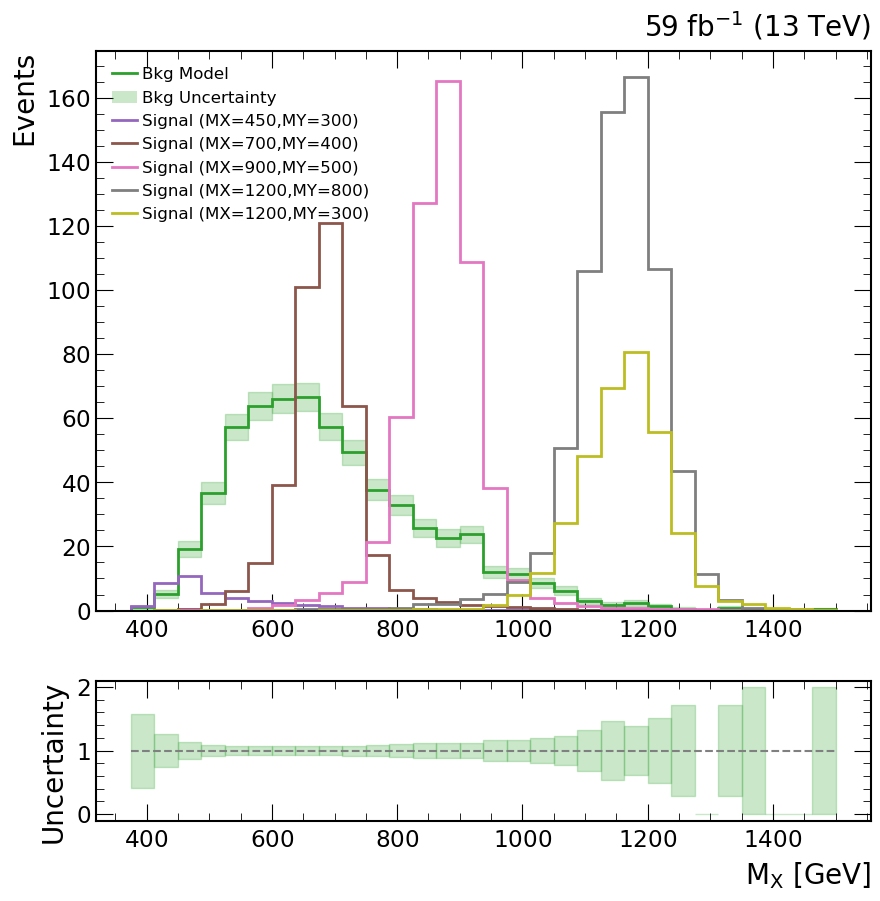

In [24]:
fig, ax, n_4b_model = data.sr_hist()
Hist(tree1.X.m[tree1.asr_hs_mask], bins=data.mBins, weights=tree1.nomWeight[tree1.asr_hs_mask], ax=ax[0], color='C4')
Hist(tree2.X.m[tree2.asr_hs_mask], bins=data.mBins, weights=tree2.nomWeight[tree2.asr_hs_mask], ax=ax[0], color='C5')
Hist(tree3.X.m[tree3.asr_hs_mask], bins=data.mBins, weights=tree3.nomWeight[tree3.asr_hs_mask], ax=ax[0], color='C6')
Hist(tree4.X.m[tree4.asr_hs_mask], bins=data.mBins, weights=tree4.nomWeight[tree4.asr_hs_mask], ax=ax[0], color='C7')
Hist(tree5.X.m[tree5.asr_hs_mask], bins=data.mBins, weights=tree5.nomWeight[tree5.asr_hs_mask], ax=ax[0], color='C8')

model_nominal = Line2D([0], [0], color='C2', lw=2, label='Bkg Model')
model_uncert = Patch(facecolor='C2', alpha=0.25, label='Bkg Uncertainty')
handle1 = Line2D([0], [0], color='C4', lw=2, label='Signal (MX=450,MY=300)')
handle2 = Line2D([0], [0], color='C5', lw=2, label='Signal (MX=700,MY=400)')
handle3 = Line2D([0], [0], color='C6', lw=2, label='Signal (MX=900,MY=500)')
handle4 = Line2D([0], [0], color='C7', lw=2, label='Signal (MX=1200,MY=800)')
handle5 = Line2D([0], [0], color='C8', lw=2, label='Signal (MX=1200,MY=300)')
handles = [model_nominal, model_uncert, handle1, handle2, handle3, handle4, handle5]
ax[0].legend(handles=handles, fontsize=12, loc=2)
ax[0].set_title(r'59 $fb^{-1}$ (13 TeV)')
fig.savefig(f'{model_savein}/sr_model_w_sig.pdf')
print(f'{model_savein}/sr_model_w_sig.pdf')

## Validation Region

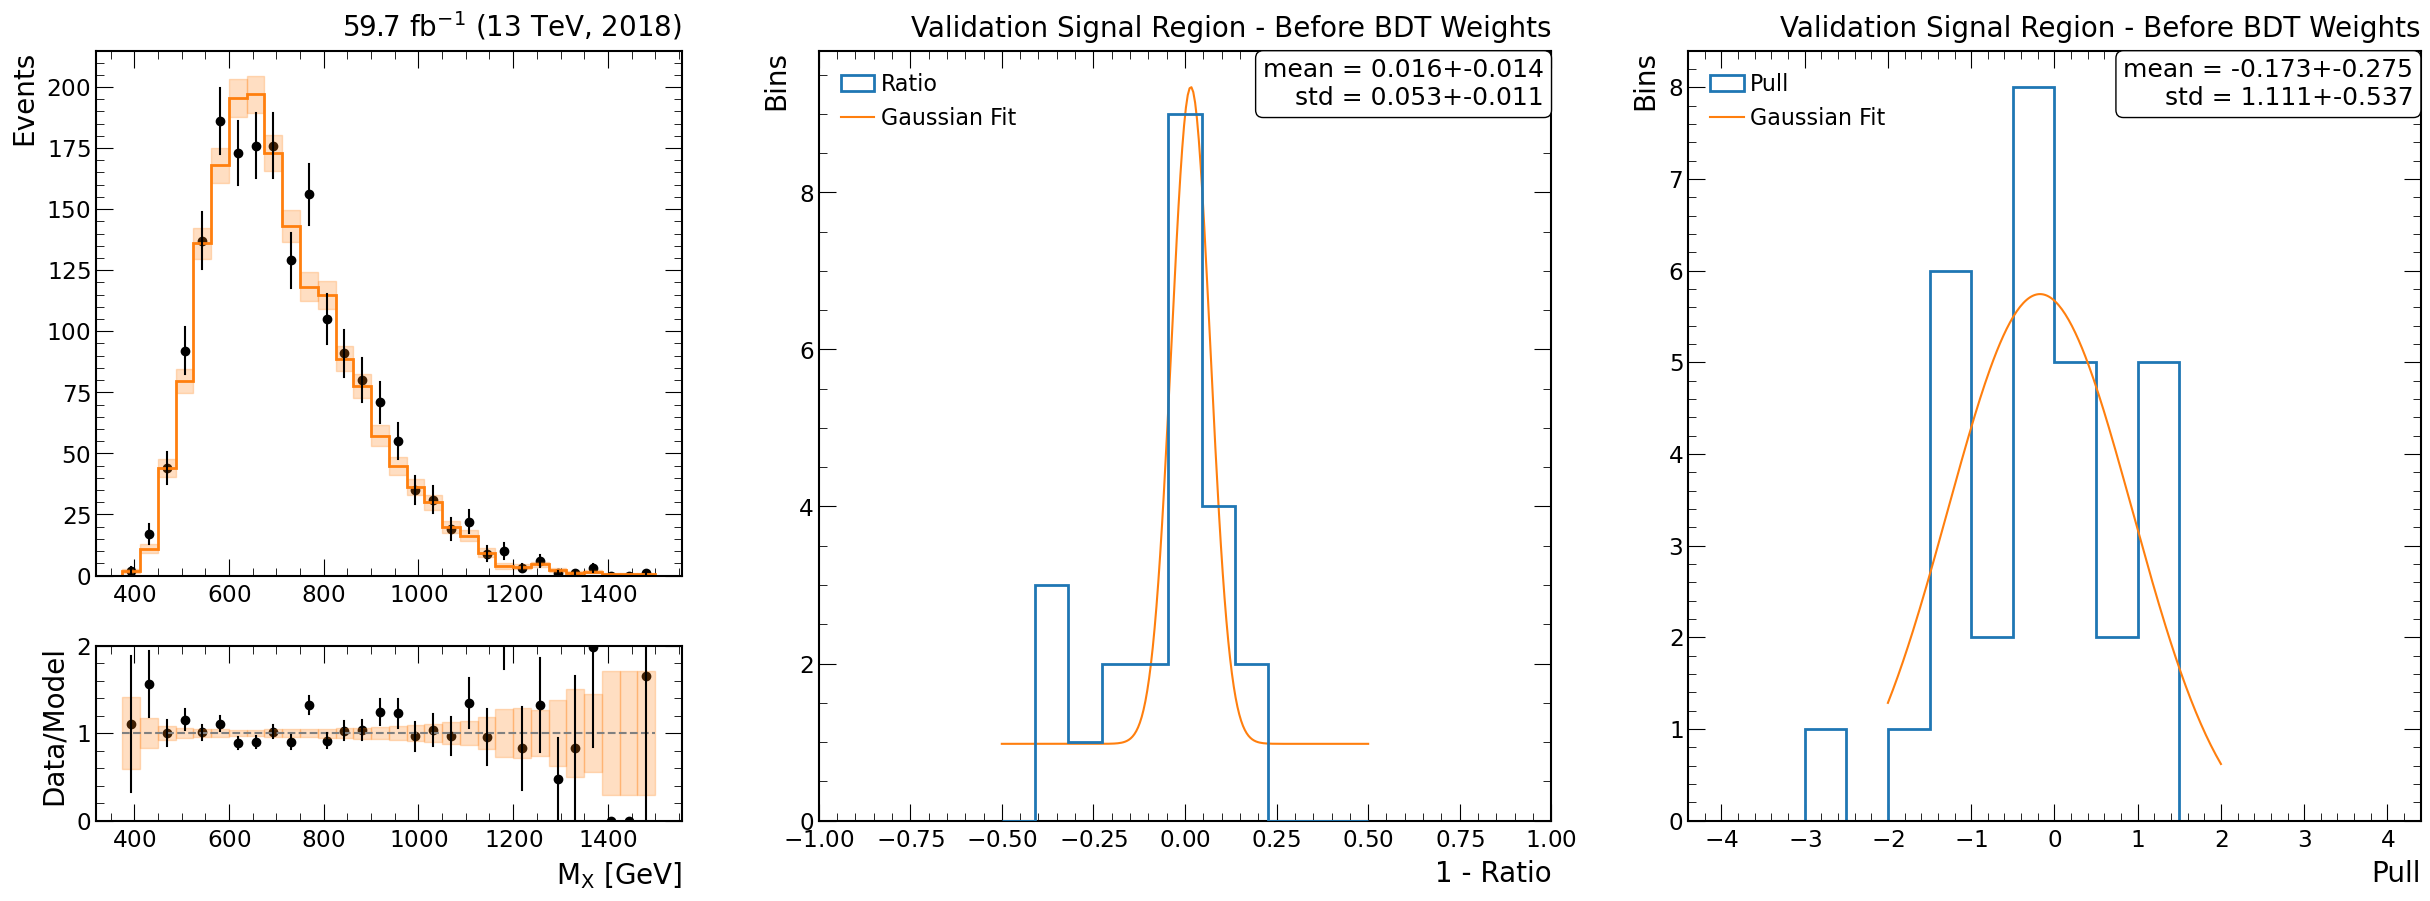

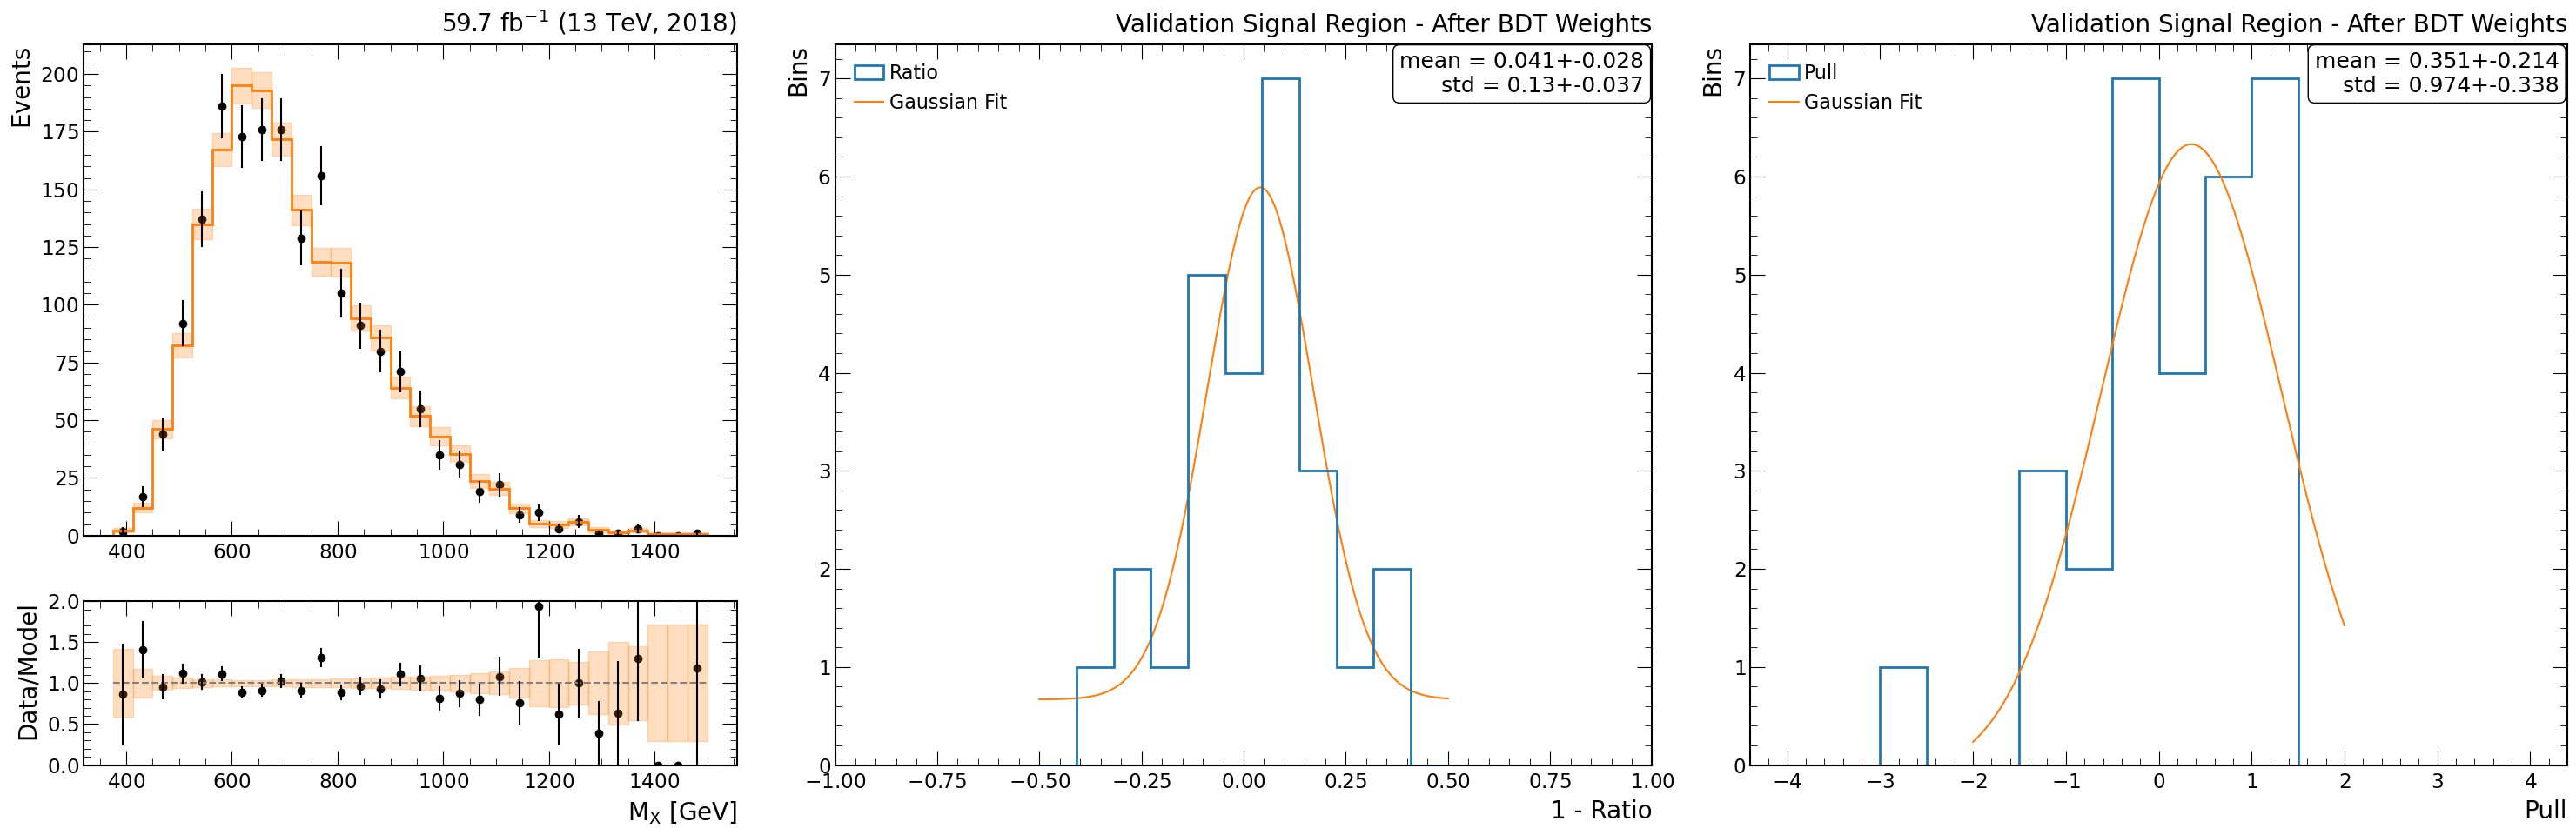

In [11]:
# data.pull_plots(savein=model_savein, filename='gnn_pull')
data.pull_plots(saveas='plots/systematics/bkg_model/normalization/vsr_mx.pdf')

0.3113640224222864
0.3113640224222864


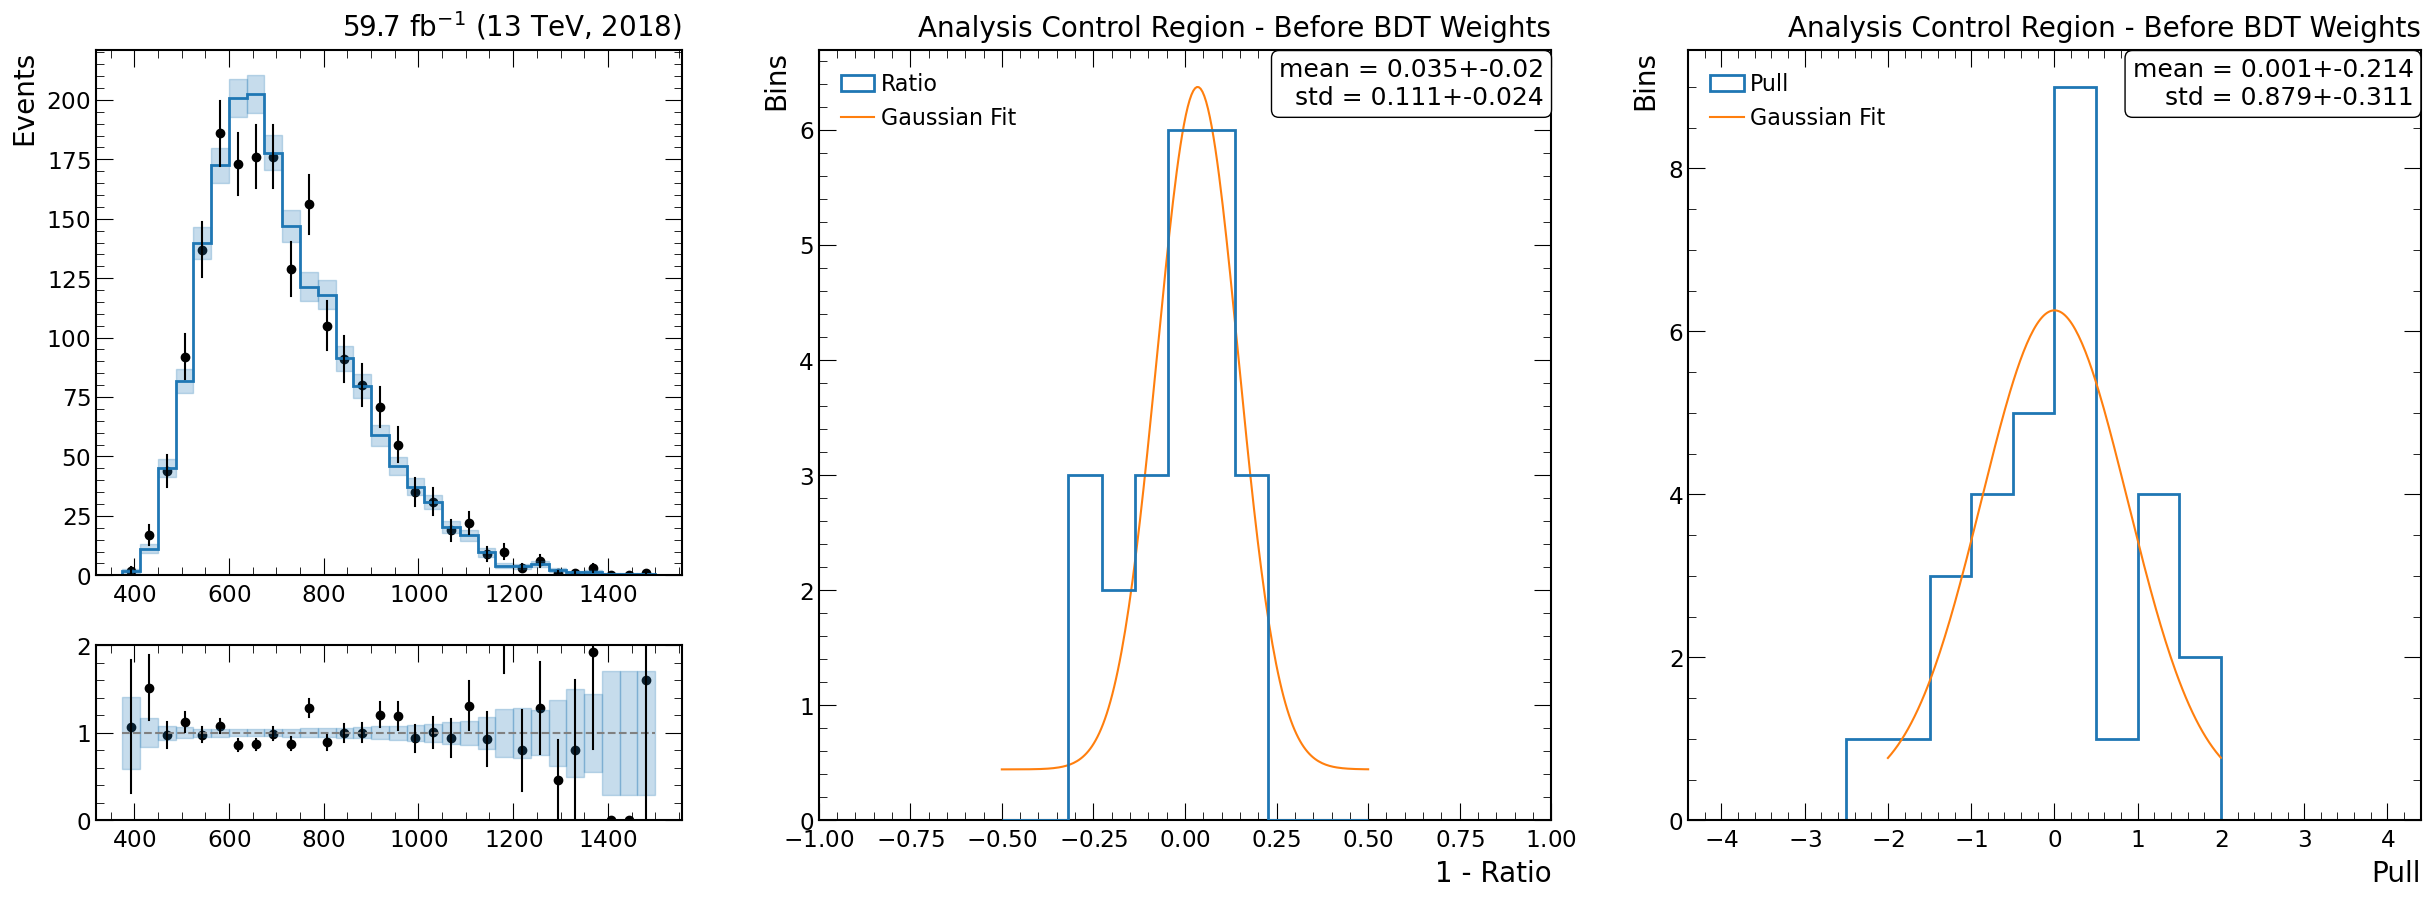

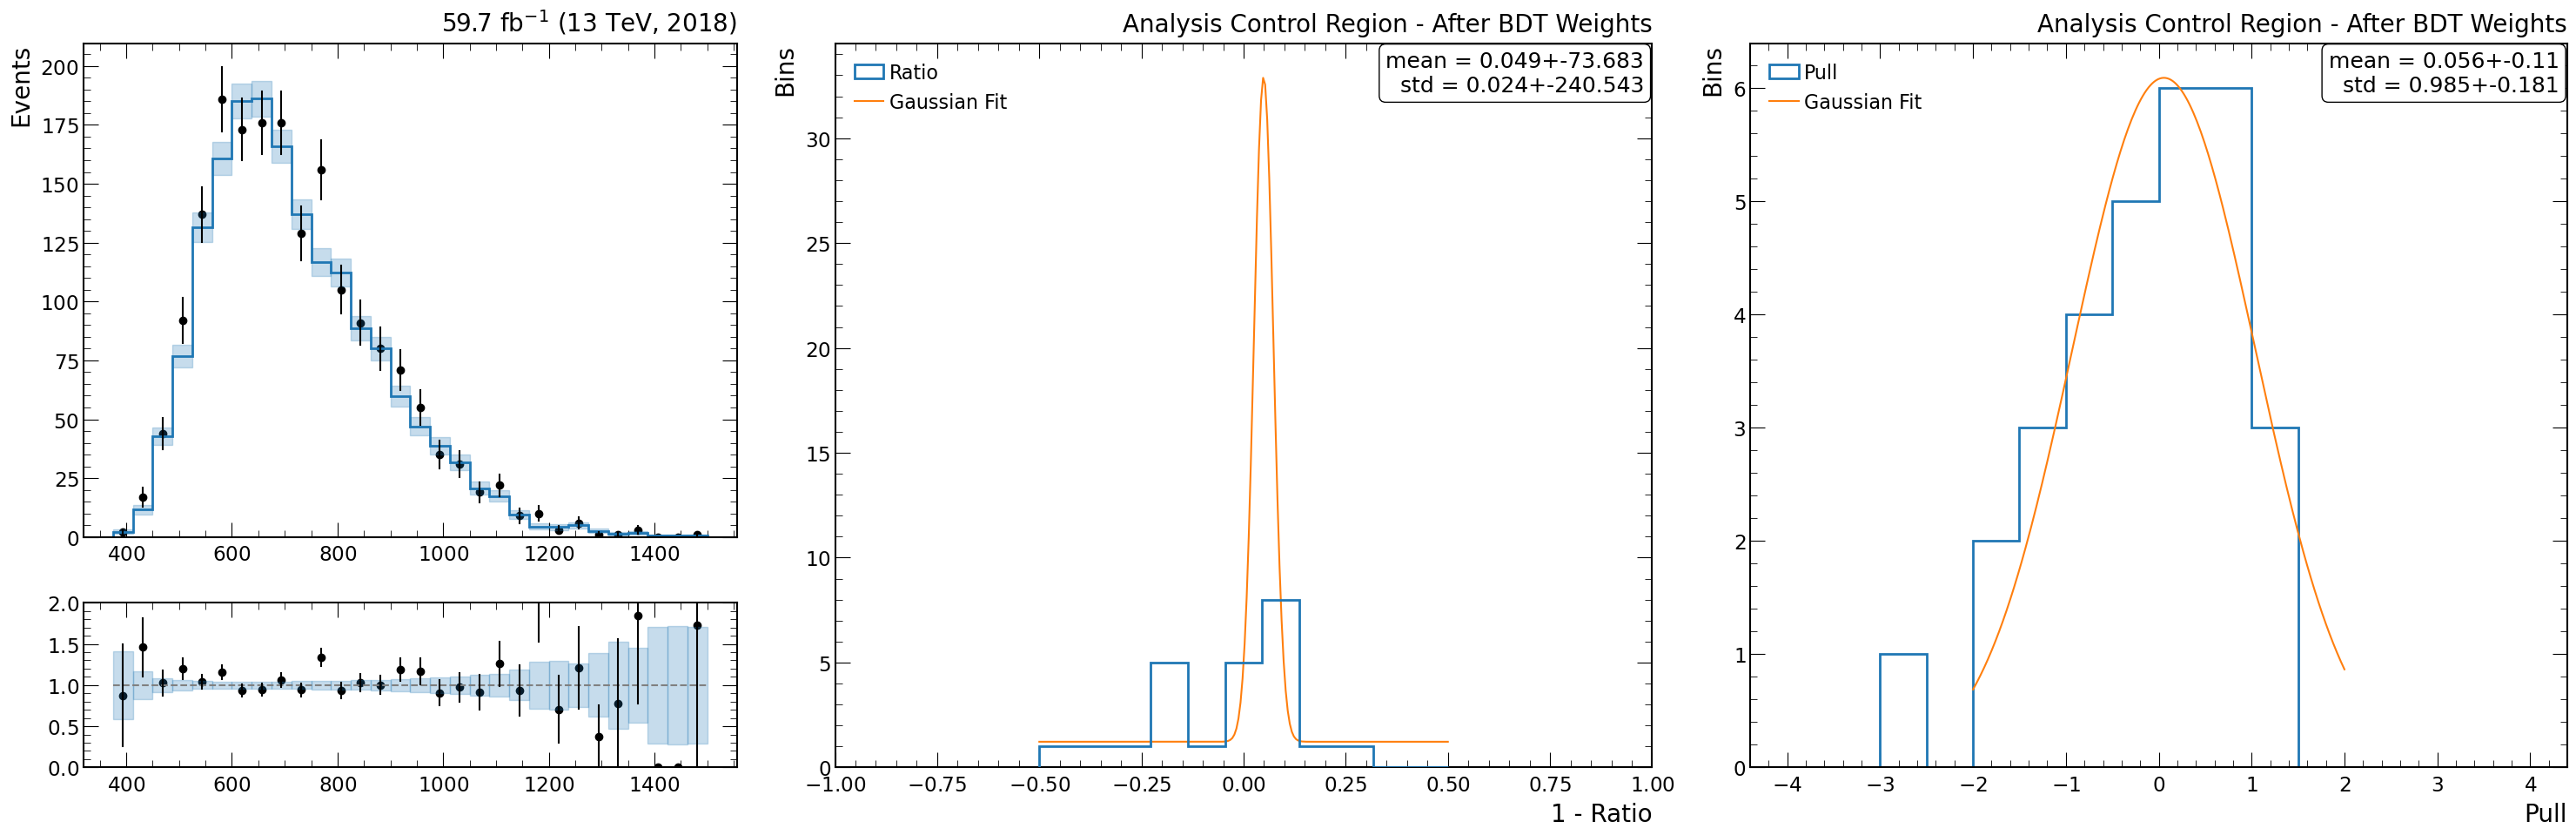

In [55]:
data.pull_plots(region='ACR')

# Alternate Trainings

## CR shift

### Increase CR

In [43]:
from configparser import ConfigParser
config = ConfigParser()
config.optionxform = str
config.read("config/bdt_params.cfg")
config['spherical']['CRedge'] = '40'

In [47]:
cr_up = Data('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/JetHT_Data_UL/ntuple.root', cfg=config)
cr_up.spherical_region()
cr_up.train()

[13:00:55] Loading                                                  ]8;id=813679;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=500261;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#93\93]8;;\
           Summer2018UL/maxbtag_4b/JetHT_Data_UL/ntuple.root...                 
[13:01:00] Loading                                                 ]8;id=99891;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=565965;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#172\172]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_o              
           fficial/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e22              
           6783a7d1c9db_ranger_lr0.0047_b

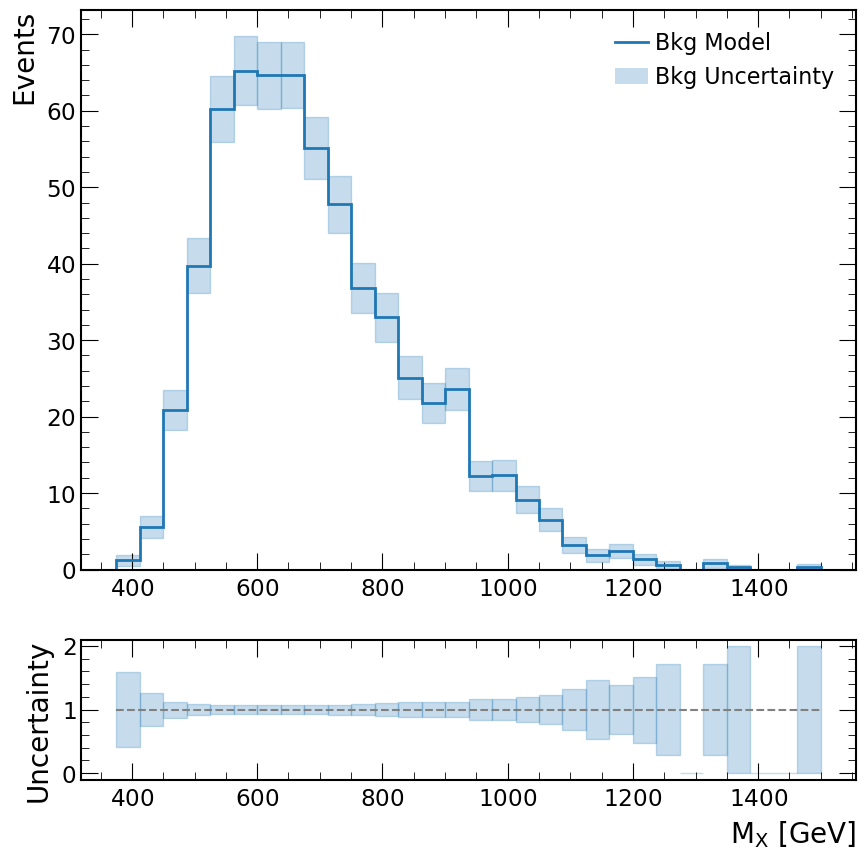

In [48]:
fig, ax, n_4b_model = cr_up.sr_hist()

### Decrease CR

In [49]:
from configparser import ConfigParser
config = ConfigParser()
config.optionxform = str
config.read("config/bdt_params.cfg")
config['spherical']['CRedge'] = '60'

In [50]:
cr_down = Data('/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/JetHT_Data_UL/ntuple.root', cfg=config)
cr_down.spherical_region()
cr_down.train()

[13:02:46] Loading                                                  ]8;id=537803;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=3020;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#93\93]8;;\
           Summer2018UL/maxbtag_4b/JetHT_Data_UL/ntuple.root...                 


[13:02:51] Loading                                                 ]8;id=318956;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=847254;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#172\172]8;;\
           /eos/uscms/store/user/srosenzw/weaver/models/exp_sixb_o              
           fficial/feynnet_ranker_6b/20230731_7d266883bbfb88fe4e22              
           6783a7d1c9db_ranger_lr0.0047_batch2000_withbkg/predict_              
           output/2018/JetHT_Data_UL.root...                                    
REGION: concentric
high avg b tag score threshold = 0.65
.. training in validation region
.. training in analysis region


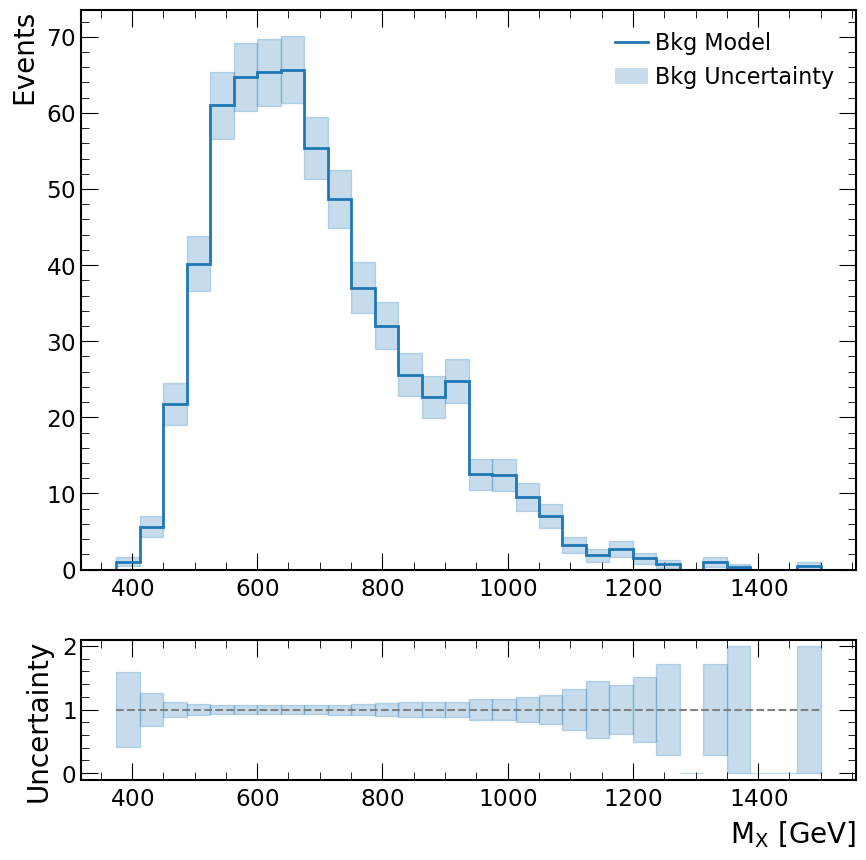

In [51]:
fig, ax, n_4b_model = cr_down.sr_hist()

## Avg b tag score shift

## Binning shift

Plotting BDT Variables

In [10]:
nbins = len(data.mBins)
var_bins = {
   'pt6bsum' : np.linspace(200, 1000, nbins),
   'dR6bmin' : np.linspace(0, 2, nbins),
   'dEta6bmax' : np.linspace(0, 4, nbins),
   'HX_pt' : np.linspace(0, 600, nbins),
   'H1_pt' : np.linspace(0, 400, nbins),
   'H2_pt' : np.linspace(0, 400, nbins),
   'HX_dr' : np.linspace(0, 4, nbins),
   'H1_dr' : np.linspace(0, 5, nbins),
   'H2_dr' : np.linspace(0, 5, nbins),
   'HX_m' : np.linspace(75, 200, nbins),
   'H1_m' : np.linspace(75, 200, nbins),
   'H2_m' : np.linspace(75, 200, nbins),
   'HX_H1_dEta' : np.linspace(0, 6, nbins),
   'H1_H2_dEta' : np.linspace(0, 6, nbins),
   'H2_HX_dEta' : np.linspace(0, 6, nbins),
   'HX_H1_dPhi' : np.linspace(0, 3.2, nbins),
   'H1_H2_dPhi' : np.linspace(0, 3.2, nbins),
   'H2_HX_dPhi' : np.linspace(0, 3.2, nbins),
   'HX_costheta' : np.linspace(0, 1, nbins),
   'H1_costheta' : np.linspace(0,1 , nbins),
   'H2_costheta' : np.linspace(0, 1, nbins),
   'Y_HX_dR' : np.linspace(0, 8, nbins),
   'H1_H2_dR' : np.linspace(0, 8, nbins),
   'HX_H1_dR' : np.linspace(0, 8, nbins),
   'HX_H2_dR' : np.linspace(0, 8, nbins),
   'X_m' : np.linspace(400, 1500, nbins)
}

var_labels = {
   'pt6bsum' : r"$\sum_{jets} p_T$ [GeV]",
   'dR6bmin' : r"${min}(\Delta R_{bb})$",
   'dEta6bmax' : r"${max}(\Delta\eta_{bb})$",
   'HX_pt' : r"$H_X \; p_T$ [GeV]",
   'H1_pt' : r"$H_1 \; p_T$ [GeV]",
   'H2_pt' : r"$H_2 \; p_T$ [GeV]",
   'HX_dr' : r"$H_X \; \Delta R_{bb}$",
   'H1_dr' : r"$H_1 \; \Delta R_{bb}$",
   'H2_dr' : r"$H_2 \; \Delta R_{bb}$",
   'HX_m' : r"$H_X \; m$ [GeV]",
   'H1_m' : r"$H_1 \; m$ [GeV]",
   'H2_m' : r"$H_2 \; m$ [GeV]",
   'HX_H1_dEta' : r"$\Delta\eta(H_X, H_1)$",
   'H1_H2_dEta' : r"$\Delta\eta(H_1, H_2)$",
   'H2_HX_dEta' : r"$\Delta\eta(H_2, H_X)$",
   'HX_H1_dPhi' : r"$\Delta\phi(H_X, H_1)$",
   'H1_H2_dPhi' : r"$\Delta\phi(H_1, H_2)$",
   'H2_HX_dPhi' : r"$\Delta\phi(H_2, H_X)$",
   'HX_costheta' : r"$\cos(\theta_{HX})$",
   'H1_costheta' : r"$\cos(\theta_{H1})$",
   'H2_costheta' : r"$\cos(\theta_{H2})$",
   'Y_HX_dR' : r"$\Delta R({Y}, H_X)$",
   'H1_H2_dR' : r"$\Delta R(H_1, H_2)$",
   'HX_H1_dR' : r"$\Delta R(H_X, H_1)$",
   'HX_H2_dR' : r"$\Delta R(H_X, H_2)$",
   'X_m' : r"$m_X$ [GeV]",
}

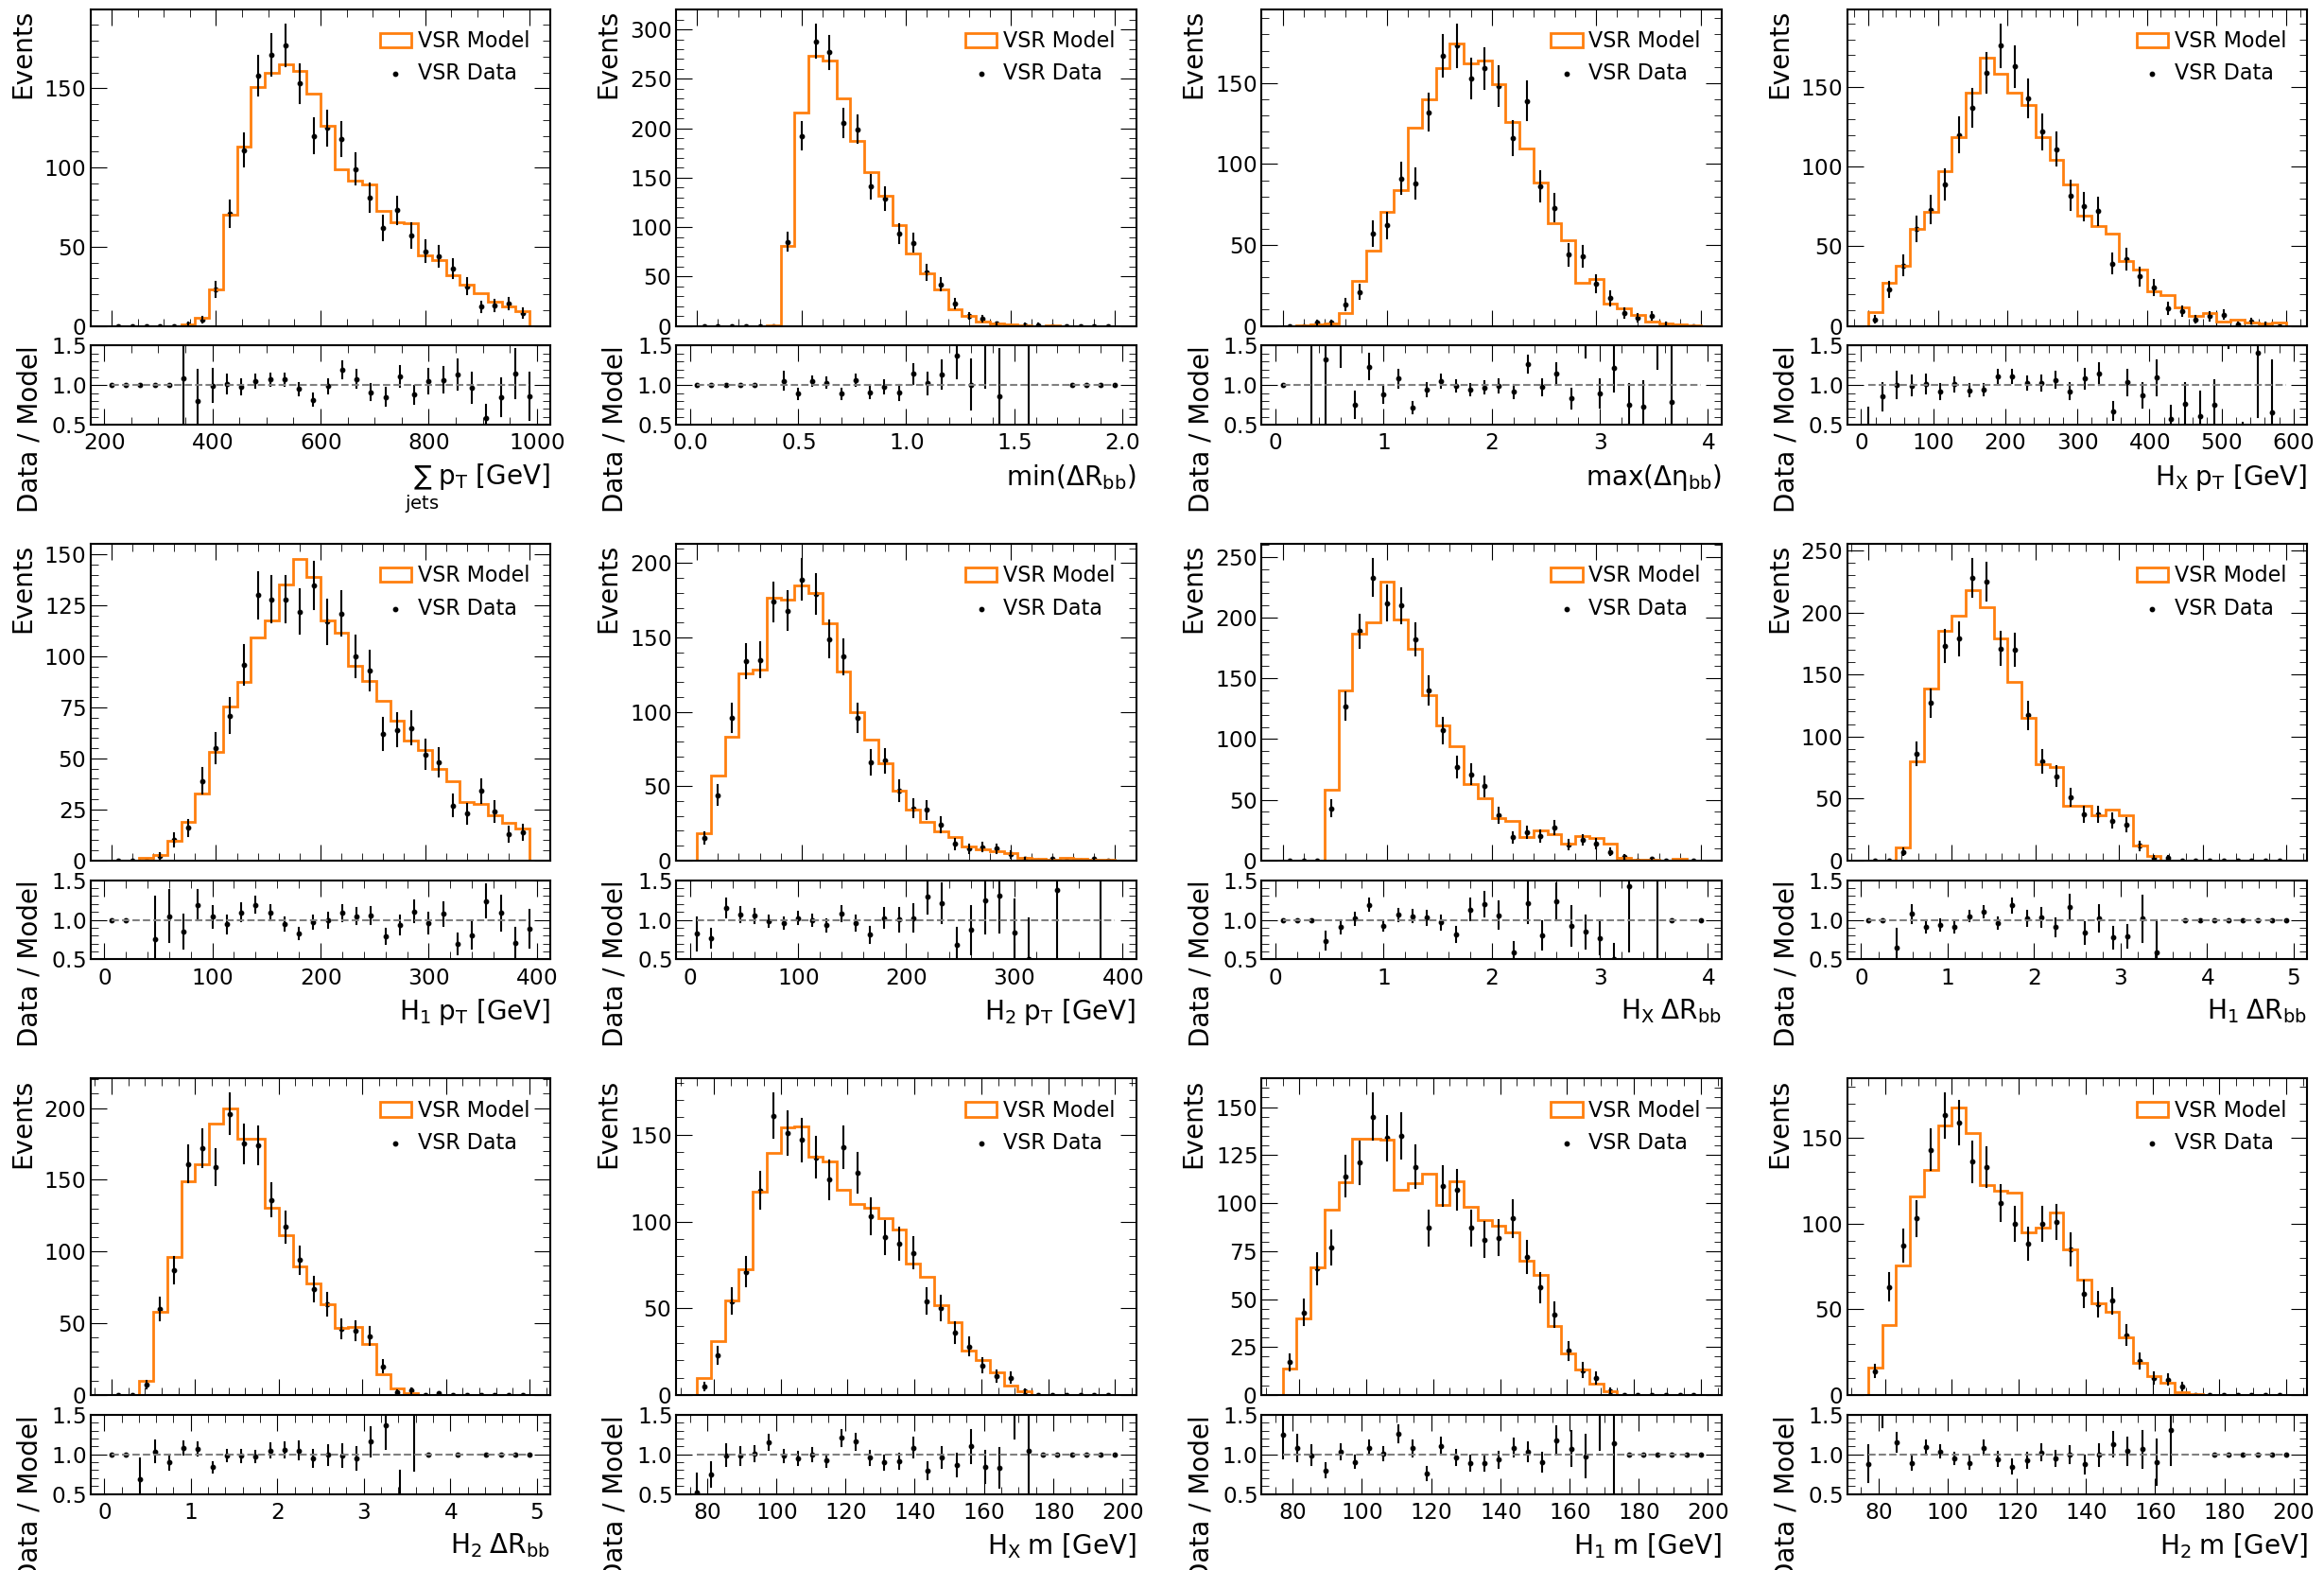

In [7]:
fig = plt.figure(figsize=(25,17))
outer_grid = fig.add_gridspec(3, 4)
for i,key in enumerate(var_labels.keys()):
    if i == 12: break
    a = i // 4
    b = i % 4
    inner_grid = outer_grid[a, b].subgridspec(2, 1, hspace=0.1, height_ratios=[4,1])
    axs = inner_grid.subplots()
    x = (var_bins[key][1:] + var_bins[key][:-1]) / 2
    n_exp = Hist(data.get(key)[data.vsr_ls_mask], bins=var_bins[key], weights=data.vsr_weights, ax=axs[0], color='C1', label='VSR Model')
    n_obs,e = np.histogram(data.get(key)[data.vsr_hs_mask], bins=var_bins[key])
    err = np.sqrt(n_obs)
    axs[0].scatter(x, n_obs, color='k', s=10, label='VSR Data')
    for e,n,a in zip(err,n_obs,x): axs[0].plot([a,a],[n-e,n+e], color='k')
    plt.setp(axs[0].get_xticklabels(), visible=False)
    axs[0].set_ylabel('Events')
    axs[0].legend()

    ratio = np.where(n_exp == n_obs, 1, n_obs/n_exp)
    r_err_up = np.where((n_exp+err) == n_obs, 1, (n_obs+err)/n_exp)
    r_err_down = np.where((n_exp-err) == n_obs, 1, (n_obs-err)/n_exp)
    for eup,edown,a in zip(r_err_up,r_err_down,x): axs[1].plot([a,a],[edown,eup], color='k')
    axs[1].plot([x[0], x[-1]], [1,1], color='gray', linestyle='--')
    axs[1].scatter(x, ratio, color='k', s=10)
    axs[1].set_ylim(0.5,1.5)

    axs[1].set_xlabel(var_labels[key])
    axs[1].set_ylabel('Data / Model')

plt.tight_layout()
fig.savefig(f'plots/6_background_modeling/bdt_variables/vars_1.pdf', bbox_inches='tight')

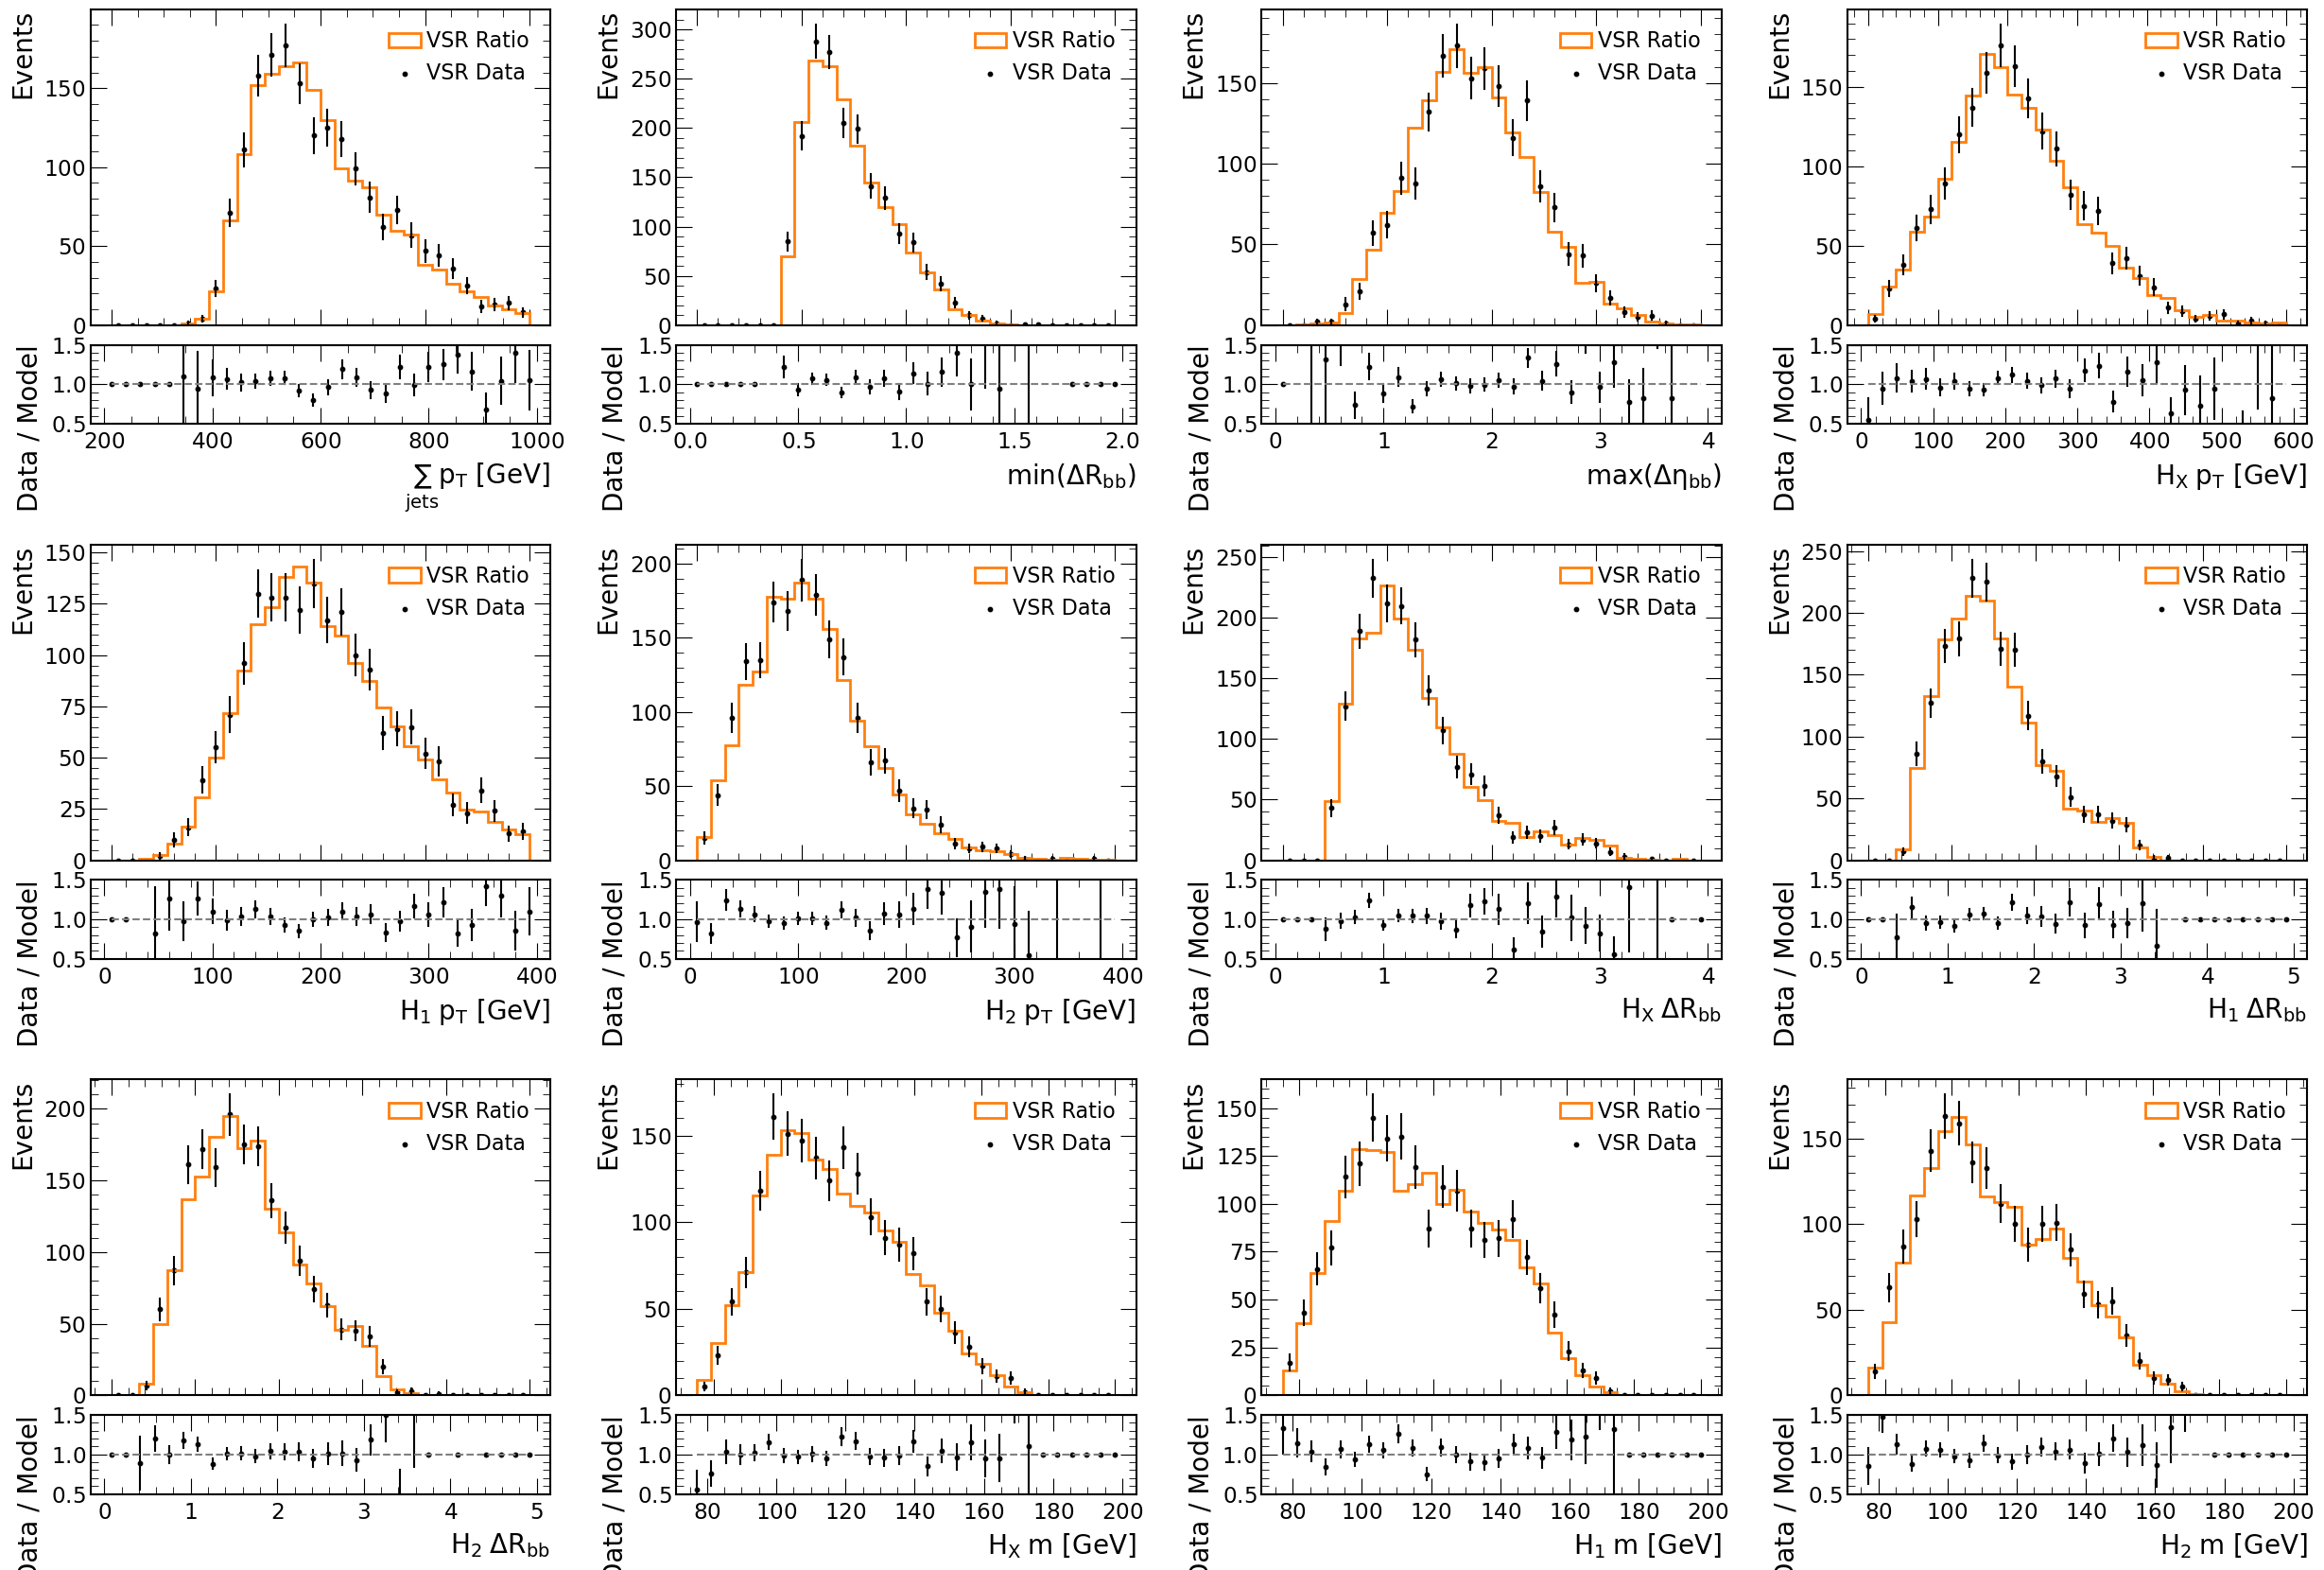

In [8]:
fig = plt.figure(figsize=(25,17))
outer_grid = fig.add_gridspec(3, 4)
for i,key in enumerate(var_labels.keys()):
    if i == 12: break
    a = i // 4
    b = i % 4
    inner_grid = outer_grid[a, b].subgridspec(2, 1, hspace=0.1, height_ratios=[4,1])
    axs = inner_grid.subplots()
    x = (var_bins[key][1:] + var_bins[key][:-1]) / 2
    n_exp = Hist(data.get(key)[data.vsr_ls_mask], bins=var_bins[key], weights=data.vr_tf, ax=axs[0], color='C1', label='VSR Ratio')
    n_obs,e = np.histogram(data.get(key)[data.vsr_hs_mask], bins=var_bins[key])
    err = np.sqrt(n_obs)
    axs[0].scatter(x, n_obs, color='k', s=10, label='VSR Data')
    for e,n,a in zip(err,n_obs,x): axs[0].plot([a,a],[n-e,n+e], color='k')
    plt.setp(axs[0].get_xticklabels(), visible=False)
    axs[0].set_ylabel('Events')
    axs[0].legend()

    ratio = np.where(n_exp == n_obs, 1, n_obs/n_exp)
    r_err_up = np.where((n_exp+err) == n_obs, 1, (n_obs+err)/n_exp)
    r_err_down = np.where((n_exp-err) == n_obs, 1, (n_obs-err)/n_exp)
    for eup,edown,a in zip(r_err_up,r_err_down,x): axs[1].plot([a,a],[edown,eup], color='k')
    axs[1].plot([x[0], x[-1]], [1,1], color='gray', linestyle='--')
    axs[1].scatter(x, ratio, color='k', s=10)
    axs[1].set_ylim(0.5,1.5)

    axs[1].set_xlabel(var_labels[key])
    axs[1].set_ylabel('Data / Model')

plt.tight_layout()
fig.savefig(f'plots/6_background_modeling/bdt_variables/vars_1_tf.pdf', bbox_inches='tight')

In [41]:
datacard = {
    'norm' : round(data.norm_err,2),
    'crtf' : round(data.crtf,2),
    'vr_stat_prec' : round(data.vr_stat_prec,2),
    'vr_yield_val' : round(data.vr_yield_val,2)
}

In [42]:
import json
with open(f"{combine_save}/data.json", "w") as f:
    json.dump(datacard, f)

In [ ]:
# fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(40,20))
# fig.suptitle('VCR')

# for i,(hs_mask,ls_mask,ax) in enumerate(zip(data.vcr_hs_masks, data.vcr_ls_masks,axs.flatten())):
#     n = Hist(data.X.m[hs_mask], bins=np.linspace(375,1500,31), ax=ax, label='vcr hs', density=True)
#     n = Hist(data.X.m[ls_mask], bins=np.linspace(375,1500,31), ax=ax, label='vcr ls', density=True)
#     ax.legend()
#     ax.set_xlabel(r"$M_X$ [GeV]")
#     ax.set_ylabel('AU')

# fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(40,20))
# fig.suptitle('VSR')

# for i,(hs_mask,ls_mask,ax) in enumerate(zip(data.vsr_hs_masks, data.vsr_ls_masks,axs.flatten())):
#     n = Hist(data.X.m[hs_mask], bins=np.linspace(375,1500,31), ax=ax, label='vcr hs', density=True)
#     n = Hist(data.X.m[ls_mask], bins=np.linspace(375,1500,31), ax=ax, label='vcr ls', density=True)
#     ax.legend()
#     ax.set_xlabel(r"$M_X$ [GeV]")
#     ax.set_ylabel('AU')

In [ ]:
# fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(40,20))
# fig.suptitle('VCR')

# for i,(hs_mask,ls_mask,ax) in enumerate(zip(data.vcr_hs_masks, data.vcr_ls_masks,axs.flatten())):
#     n = Hist(data.X.m[hs_mask], bins=np.linspace(375,1500,31), ax=ax, label='vcr hs')
#     n = Hist(data.X.m[ls_mask], bins=np.linspace(375,1500,31), ax=ax, label='vcr ls')
#     ax.legend()
#     ax.set_xlabel(r"$M_X$ [GeV]")
#     ax.set_ylabel('AU')

# fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(40,20))
# fig.suptitle('VSR')

# for i,(hs_mask,ls_mask,ax) in enumerate(zip(data.vsr_hs_masks, data.vsr_ls_masks,axs.flatten())):
#     n = Hist(data.X.m[hs_mask], bins=np.linspace(375,1500,31), ax=ax, label='vcr hs')
#     n = Hist(data.X.m[ls_mask], bins=np.linspace(375,1500,31), ax=ax, label='vcr ls')
#     ax.legend()
#     ax.set_xlabel(r"$M_X$ [GeV]")
#     ax.set_ylabel('AU')

In [ ]:
# fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(40,20))
# fig.suptitle('High Avg b Tag Score')

# for i,(vcr_hs_mask,vsr_hs_mask,ax) in enumerate(zip(data.vcr_hs_masks, data.vsr_hs_masks,axs.flatten())):
#     n = Hist(data.X.m[vcr_hs_mask], bins=np.linspace(375,1500,31), ax=ax, label='vcr hs', density=True)
#     n = Hist(data.X.m[vsr_hs_mask], bins=np.linspace(375,1500,31), ax=ax, label='vsr hs', density=True)
#     ax.legend()
#     ax.set_xlabel(r"$M_X$ [GeV]")
#     ax.set_ylabel('AU')

# fig, axs = plt.subplots(nrows=2, ncols=4, figsize=(40,20))
# fig.suptitle('Low Avg b Tag Score')

# for i,(vcr_hs_mask,vsr_hs_mask,ax) in enumerate(zip(data.vcr_ls_masks, data.vsr_ls_masks,axs.flatten())):
#     n = Hist(data.X.m[vcr_hs_mask], bins=np.linspace(375,1500,31), ax=ax, label='vcr ls', density=True)
#     n = Hist(data.X.m[vsr_hs_mask], bins=np.linspace(375,1500,31), ax=ax, label='vsr ls', density=True)
#     ax.legend()
#     ax.set_xlabel(r"$M_X$ [GeV]")
#     ax.set_ylabel('AU')

In [ ]:
# bias_data.v_sr_hist()
# # gnn_data.v_sr_hist()
# data.v_sr_hist()

In [32]:
from array import array
import ROOT
ROOT.gROOT.SetBatch(True)

In [33]:
nbins = len(data.mBins)

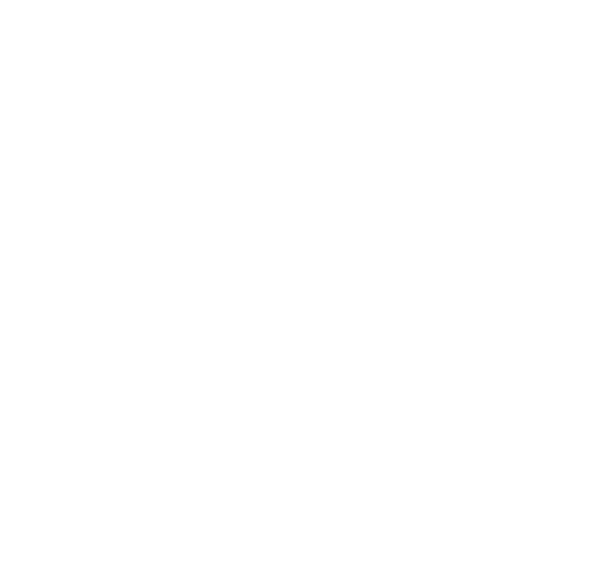

In [36]:
try: del canvas, ROOT_hist
except: pass

# fout = ROOT.TFile(f"plots/gnn/data_asr_model.root","recreate")
filename = f"{combine_save}/data.root"
fout = ROOT.TFile(filename,"recreate")
fout.cd()

canvas = ROOT.TCanvas('c1','c1', 600, 600)
canvas.SetFrameLineWidth(3)
canvas.Draw()

h_title = f"data"
ROOT_hist = ROOT.TH1D(h_title,";m_{X} [GeV];Events",nbins-1,array('d',list(data.mBins)))
for i,(val) in enumerate(n_4b_model):
    ROOT_hist.SetBinContent(i+1, val) 

ROOT_hist.Draw("hist")
ROOT_hist.Write()
fout.Close()
# fout.Save()
# ROOT.gStyle.SetOptStat(0)

h_data_gnn = up.open(filename)['data']

In [ ]:
import subprocess, shlex

In [ ]:
poi = np.linspace(0.1, 5, 50)
level = 0.05

In [ ]:
def get_stats(h_data, h_signal):
    norm = 2*np.sqrt(np.sum(h_data.errors()**2))/h_signal.counts().sum()
    w = pyhf.simplemodels.uncorrelated_background(signal=(norm*h_signal.counts()).tolist(), bkg=h_data.counts().tolist(), bkg_uncertainty=h_data.errors().tolist())
    data = h_data.counts().tolist() + w.config.auxdata

    obs_limit, exp_limit, (scan, results) = pyhf.infer.intervals.upperlimit(
          data, w, poi, level=level, return_results=True
      )
    obs_limit, exp_limit = norm*obs_limit, [ norm*lim for lim in exp_limit ]
    return norm, w, data, obs_limit, exp_limit

In [ ]:
base = '/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/maxbtag_4b/Official_NMSSM'
cmd = f"ls {base}"
output = subprocess.check_output(shlex.split(cmd))
output = output.decode('UTF-8')
output = output.split('\n')
output = [f"{base}/{out}/ntuple.root" for out in output if out.startswith('NMSSM')]
# output

In [ ]:
for signal in gnn_signal:
    tree = SixB(signal)
    

In [ ]:
gnn_signal = [SixB(out) for out in output]

[14:15:12] Loading                                                                                    ]8;id=29667;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=840865;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:15:16] Loading                                                                                    ]8;id=484863;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=113392;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1000_MY-250_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:15:19] Loading                                                                                    ]8;id=134660;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=553572;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-350_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:15:23] Loading                                                                                    ]8;id=359706;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=644014;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1000_MY-350_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:15:27] Loading                                                                                    ]8;id=310388;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=360977;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-400_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:15:32] Loading                                                                                    ]8;id=537668;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=82738;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1000_MY-400_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:15:36] Loading                                                                                    ]8;id=993489;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=670519;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-450_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:15:40] Loading                                                                                    ]8;id=789836;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=277903;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1000_MY-450_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:15:43] Loading                                                                                    ]8;id=587446;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=982281;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-500_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:15:47] Loading                                                                                    ]8;id=91473;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=277775;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1000_MY-500_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:15:51] Loading                                                                                    ]8;id=371367;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=977891;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-600_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:16:02] Loading                                                                                    ]8;id=784143;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=179948;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1000_MY-600_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:16:11] Loading                                                                                    ]8;id=806670;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=589243;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-700_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:16:15] Loading                                                                                    ]8;id=543149;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=132531;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1000_MY-700_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:16:19] Loading                                                                                    ]8;id=408388;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=470333;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1000_MY-800_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:16:23] Loading                                                                                    ]8;id=801762;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=471474;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1000_MY-800_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:16:27] Loading                                                                                    ]8;id=928475;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=450958;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-250_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:16:30] Loading                                                                                    ]8;id=1746;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=880689;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1100_MY-250_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:16:33] Loading                                                                                    ]8;id=488070;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=608017;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-300_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:16:37] Loading                                                                                    ]8;id=395276;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=598095;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1100_MY-300_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:16:41] Loading                                                                                    ]8;id=968372;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=91576;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-350_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:16:45] Loading                                                                                    ]8;id=191004;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=215590;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1100_MY-350_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:16:48] Loading                                                                                    ]8;id=336629;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=471195;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-400_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:16:52] Loading                                                                                    ]8;id=650927;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=308931;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1100_MY-400_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:16:55] Loading                                                                                    ]8;id=708895;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=879212;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-450_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:17:00] Loading                                                                                    ]8;id=834745;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=401032;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1100_MY-450_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:17:03] Loading                                                                                    ]8;id=642458;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=937596;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-500_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:17:07] Loading                                                                                    ]8;id=663415;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=3370;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1100_MY-500_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:17:11] Loading                                                                                    ]8;id=99189;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=850680;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-600_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:17:16] Loading                                                                                    ]8;id=528231;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=319474;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1100_MY-600_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:17:20] Loading                                                                                    ]8;id=252730;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=279669;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-700_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:17:24] Loading                                                                                    ]8;id=509893;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=574375;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1100_MY-700_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:17:28] Loading                                                                                    ]8;id=123346;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=437185;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-800_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:17:32] Loading                                                                                    ]8;id=82815;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=120890;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1100_MY-800_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:17:36] Loading                                                                                    ]8;id=822468;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=591284;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1100_MY-900_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:17:39] Loading                                                                                    ]8;id=688848;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=237547;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1100_MY-900_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:17:43] Loading                                                                                    ]8;id=762909;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=7847;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-1000_TuneCP5_13TeV-madgr              
           aph-pythia8/ntuple.root...                                                                              

[14:17:47] Loading                                                                                    ]8;id=227860;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=309823;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1200_MY-1000_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                         

[14:17:51] Loading                                                                                    ]8;id=925460;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=86632;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-250_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:17:54] Loading                                                                                    ]8;id=501480;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=935785;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1200_MY-250_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:17:57] Loading                                                                                    ]8;id=207620;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=569513;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-300_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:18:01] Loading                                                                                    ]8;id=165829;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=791261;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1200_MY-300_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:18:04] Loading                                                                                    ]8;id=806374;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=941106;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-350_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:18:08] Loading                                                                                    ]8;id=301183;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=335929;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1200_MY-350_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:18:12] Loading                                                                                    ]8;id=26167;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=41405;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-400_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:18:15] Loading                                                                                    ]8;id=250931;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=686508;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1200_MY-400_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:18:19] Loading                                                                                    ]8;id=433429;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=850164;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-450_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:18:23] Loading                                                                                    ]8;id=292188;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=557076;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1200_MY-450_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:18:27] Loading                                                                                    ]8;id=669477;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=585335;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-600_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:18:31] Loading                                                                                    ]8;id=772444;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=344583;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1200_MY-600_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:18:35] Loading                                                                                    ]8;id=989094;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=702109;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-700_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:18:40] Loading                                                                                    ]8;id=786556;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=594803;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1200_MY-700_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:18:44] Loading                                                                                    ]8;id=138505;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=60546;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-800_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:18:48] Loading                                                                                    ]8;id=533608;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=262867;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1200_MY-800_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:18:52] Loading                                                                                    ]8;id=792443;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=314507;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-1200_MY-900_TuneCP5_13TeV-madgra              
           ph-pythia8/ntuple.root...                                                                               

[14:18:56] Loading                                                                                    ]8;id=861542;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=777668;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-1200_MY-900_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                          

[14:19:00] Loading                                                                                    ]8;id=250190;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=115946;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-400_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:19:02] Loading                                                                                    ]8;id=384550;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=350998;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-400_MY-250_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:19:05] Loading                                                                                    ]8;id=460740;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=324876;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-450_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:19:08] Loading                                                                                    ]8;id=294926;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=40250;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-450_MY-250_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:19:11] Loading                                                                                    ]8;id=699532;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=701492;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-450_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:19:22] Loading                                                                                    ]8;id=716361;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=457571;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-450_MY-300_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:19:30] Loading                                                                                    ]8;id=955341;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=158103;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-500_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:19:33] Loading                                                                                    ]8;id=4850;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=958190;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-500_MY-250_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:19:36] Loading                                                                                    ]8;id=485670;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=835264;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-500_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:19:39] Loading                                                                                    ]8;id=995980;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=131899;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-500_MY-350_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:19:42] Loading                                                                                    ]8;id=409860;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=728887;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-550_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:19:47] Loading                                                                                    ]8;id=264020;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=227299;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-550_MY-250_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:19:50] Loading                                                                                    ]8;id=894270;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=56063;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-550_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:19:55] Loading                                                                                    ]8;id=751245;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=121982;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-550_MY-300_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:19:59] Loading                                                                                    ]8;id=499871;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=972821;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-550_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:20:02] Loading                                                                                    ]8;id=268094;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=864019;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-550_MY-350_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:20:05] Loading                                                                                    ]8;id=945795;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=995690;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-550_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:20:09] Loading                                                                                    ]8;id=330853;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=843612;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-550_MY-400_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:20:11] Loading                                                                                    ]8;id=638746;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=609913;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-600_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:20:16] Loading                                                                                    ]8;id=592364;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=456940;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-600_MY-250_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:20:19] Loading                                                                                    ]8;id=778659;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=955615;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-600_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:20:22] Loading                                                                                    ]8;id=472428;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=439313;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-600_MY-300_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:20:25] Loading                                                                                    ]8;id=70868;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=334500;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-600_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:20:30] Loading                                                                                    ]8;id=372599;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=101938;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-600_MY-350_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:20:33] Loading                                                                                    ]8;id=192252;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=156286;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-600_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:20:37] Loading                                                                                    ]8;id=436335;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=717719;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-600_MY-400_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:20:40] Loading                                                                                    ]8;id=148110;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=36181;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-600_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:20:44] Loading                                                                                    ]8;id=3554;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=448294;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-600_MY-450_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:20:47] Loading                                                                                    ]8;id=704553;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=656508;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-650_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:20:50] Loading                                                                                    ]8;id=452385;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=628920;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-650_MY-250_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:20:53] Loading                                                                                    ]8;id=360221;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=895888;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-650_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:20:58] Loading                                                                                    ]8;id=459964;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=859161;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-650_MY-300_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:21:01] Loading                                                                                    ]8;id=921685;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=796745;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-650_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:21:05] Loading                                                                                    ]8;id=146463;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=603180;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-650_MY-350_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:21:08] Loading                                                                                    ]8;id=830518;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=927266;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-650_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:21:12] Loading                                                                                    ]8;id=99295;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=723506;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-650_MY-400_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:21:15] Loading                                                                                    ]8;id=558578;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=879949;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-650_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:21:19] Loading                                                                                    ]8;id=376802;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=714501;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-650_MY-450_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:21:22] Loading                                                                                    ]8;id=777310;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=173122;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:21:26] Loading                                                                                    ]8;id=479741;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=815699;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-700_MY-250_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:21:29] Loading                                                                                    ]8;id=933129;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=326460;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:21:33] Loading                                                                                    ]8;id=986259;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=206989;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-700_MY-300_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:21:37] Loading                                                                                    ]8;id=958466;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=78061;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:21:41] Loading                                                                                    ]8;id=853633;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=319752;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-700_MY-350_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:21:44] Loading                                                                                    ]8;id=290129;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=190846;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:21:55] Loading                                                                                    ]8;id=755787;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=346145;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-700_MY-400_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:22:03] Loading                                                                                    ]8;id=47794;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=83750;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:22:07] Loading                                                                                    ]8;id=928919;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=379818;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-700_MY-450_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:22:11] Loading                                                                                    ]8;id=528349;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=433223;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-700_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:22:15] Loading                                                                                    ]8;id=116854;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=871303;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-700_MY-500_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:22:18] Loading                                                                                    ]8;id=566939;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=163252;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:22:22] Loading                                                                                    ]8;id=373947;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=155762;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-750_MY-300_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:22:25] Loading                                                                                    ]8;id=720309;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=384786;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:22:30] Loading                                                                                    ]8;id=288676;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=787093;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-750_MY-350_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:22:34] Loading                                                                                    ]8;id=401763;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=212306;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:22:38] Loading                                                                                    ]8;id=104769;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=914264;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-750_MY-400_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:22:42] Loading                                                                                    ]8;id=604709;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=49492;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:22:46] Loading                                                                                    ]8;id=243791;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=655289;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-750_MY-450_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:22:49] Loading                                                                                    ]8;id=105863;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=537716;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:22:53] Loading                                                                                    ]8;id=372567;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=710063;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-750_MY-500_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:22:57] Loading                                                                                    ]8;id=331750;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=967991;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-750_MY-600_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:23:01] Loading                                                                                    ]8;id=523828;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=860374;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-750_MY-600_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:23:04] Loading                                                                                    ]8;id=326901;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=957832;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:23:08] Loading                                                                                    ]8;id=527190;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=771796;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-800_MY-250_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:23:11] Loading                                                                                    ]8;id=117101;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=374363;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:23:15] Loading                                                                                    ]8;id=857723;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=106323;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-800_MY-300_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:23:19] Loading                                                                                    ]8;id=221632;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=446648;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:23:23] Loading                                                                                    ]8;id=195736;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=848132;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-800_MY-350_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:23:26] Loading                                                                                    ]8;id=254349;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=367329;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:23:30] Loading                                                                                    ]8;id=522466;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=545500;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-800_MY-400_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:23:33] Loading                                                                                    ]8;id=945272;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=821541;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:23:37] Loading                                                                                    ]8;id=35466;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=646492;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-800_MY-450_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:23:41] Loading                                                                                    ]8;id=418604;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=369575;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:23:45] Loading                                                                                    ]8;id=586857;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=46524;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-800_MY-500_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:23:48] Loading                                                                                    ]8;id=257656;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=688669;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-800_MY-600_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:23:52] Loading                                                                                    ]8;id=697299;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=118671;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-800_MY-600_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:23:56] Loading                                                                                    ]8;id=287707;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=544174;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:23:59] Loading                                                                                    ]8;id=352782;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=842247;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-850_MY-250_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:24:02] Loading                                                                                    ]8;id=127856;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=88567;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:24:06] Loading                                                                                    ]8;id=268247;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=181193;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-850_MY-300_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:24:10] Loading                                                                                    ]8;id=412707;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=27368;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:24:15] Loading                                                                                    ]8;id=142699;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=788624;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-850_MY-350_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:24:18] Loading                                                                                    ]8;id=549073;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=581939;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:24:22] Loading                                                                                    ]8;id=702924;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=456085;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-850_MY-400_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:24:25] Loading                                                                                    ]8;id=144013;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=729248;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:24:29] Loading                                                                                    ]8;id=543873;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=33047;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-850_MY-450_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:24:32] Loading                                                                                    ]8;id=210530;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=421654;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:24:36] Loading                                                                                    ]8;id=152082;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=473390;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-850_MY-500_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:24:40] Loading                                                                                    ]8;id=358968;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=2984;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-600_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:24:45] Loading                                                                                    ]8;id=126574;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=551382;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-850_MY-600_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:24:48] Loading                                                                                    ]8;id=270994;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=449717;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-850_MY-700_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:24:52] Loading                                                                                    ]8;id=41800;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=447852;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-850_MY-700_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:24:55] Loading                                                                                    ]8;id=205344;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=327856;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-250_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:24:58] Loading                                                                                    ]8;id=921810;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=385149;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-900_MY-250_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:25:02] Loading                                                                                    ]8;id=667121;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=284973;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:25:13] Loading                                                                                    ]8;id=990860;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=381280;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-900_MY-300_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:25:21] Loading                                                                                    ]8;id=801569;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=451067;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:25:24] Loading                                                                                    ]8;id=235299;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=572130;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-900_MY-350_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:25:28] Loading                                                                                    ]8;id=613595;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=605391;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:25:31] Loading                                                                                    ]8;id=230374;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=95812;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-900_MY-400_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:25:35] Loading                                                                                    ]8;id=636881;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=841204;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:25:38] Loading                                                                                    ]8;id=814365;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=276651;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-900_MY-450_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:25:42] Loading                                                                                    ]8;id=983649;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=509337;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:25:46] Loading                                                                                    ]8;id=943547;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=37997;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-900_MY-500_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:25:49] Loading                                                                                    ]8;id=953229;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=543308;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-600_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:25:53] Loading                                                                                    ]8;id=490890;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=850799;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-900_MY-600_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:25:57] Loading                                                                                    ]8;id=113366;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=529849;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-900_MY-700_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:26:01] Loading                                                                                    ]8;id=151089;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=933205;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-900_MY-700_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:26:04] Loading                                                                                    ]8;id=197322;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=239819;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-300_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:26:08] Loading                                                                                    ]8;id=504687;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=734895;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-950_MY-300_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:26:12] Loading                                                                                    ]8;id=514930;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=750734;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-350_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:26:16] Loading                                                                                    ]8;id=909495;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=275988;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-950_MY-350_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:26:19] Loading                                                                                    ]8;id=682556;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=651768;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-400_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:26:23] Loading                                                                                    ]8;id=117396;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=201963;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-950_MY-400_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:26:27] Loading                                                                                    ]8;id=64347;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=93823;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-450_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:26:31] Loading                                                                                    ]8;id=561421;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=611295;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-950_MY-450_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:26:35] Loading                                                                                    ]8;id=171602;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=212002;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-500_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:26:39] Loading                                                                                    ]8;id=256727;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=6543;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-950_MY-500_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:26:42] Loading                                                                                    ]8;id=918608;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=998634;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-600_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:26:47] Loading                                                                                    ]8;id=960227;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=651063;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-950_MY-600_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:26:50] Loading                                                                                    ]8;id=124825;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=859751;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-700_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:26:54] Loading                                                                                    ]8;id=444377;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=830915;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-950_MY-700_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

[14:26:58] Loading                                                                                    ]8;id=18456;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=121341;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#124\124]8;;\
           Summer2018UL/maxbtag_4b/Official_NMSSM/NMSSM_XToYHTo6B_MX-950_MY-800_TuneCP5_13TeV-madgrap              
           h-pythia8/ntuple.root...                                                                                

[14:27:01] Loading                                                                                    ]8;id=274748;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py\signal.py]8;;\:]8;id=762677;file:///uscms_data/d3/srosenzw/workarea/higgs/sixb_analysis/CMSSW_10_6_19_patch2/src/sixb/utils/analysis/signal.py#212\212]8;;\
           20230504_ranger_lr0.0047_batch1024__lightning_100epochs_reweighting_withbkg/predict_output              
           /NMSSM_XToYHTo6B_MX-950_MY-800_TuneCP5_13TeV-madgraph-pythia8.root_4b.awkd...                           

In [ ]:
[tree.spherical_region() for tree in gnn_signal]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
print(np.unique([signal.mx for signal in gnn_signal]))

[ 400  450  500  550  600  650  700  750  800  850  900  950 1000 1100
 1200]


In [ ]:
MX = np.unique([signal.mx for signal in gnn_signal])
MY = np.unique([signal.my for signal in gnn_signal])

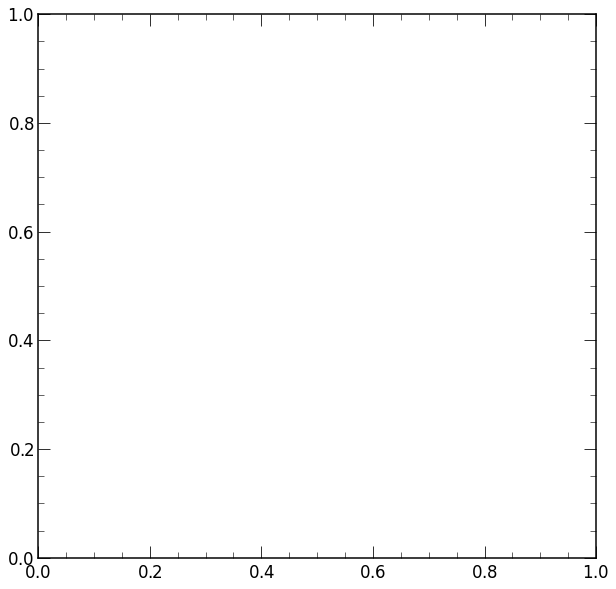

In [ ]:
fig, ax = plt.subplots()

In [ ]:
nonML_n = {mx : {} for mx in MX}
gnn_n = {mx : {} for mx in MX}
for gnn in gnn_signal:
# for nonML,gnn in zip(nonML_signal,gnn_signal):
    # nonML_n[nonML.mx][nonML.my] = nonML.hist(nonML.X.m[nonML.asr_hs_mask], bins=np.linspace(375,2000,31), ax=ax)
    gnn_n[gnn.mx][gnn.my] = gnn.hist(gnn.X.m[gnn.asr_hs_mask], bins=np.linspace(375,2000,31), ax=ax)

In [ ]:
# import pandas as pd

In [ ]:
# df_gnn = pd.concat({k: pd.DataFrame(v).T for k, v in gnn_n.items()}, axis=0)
# df_nonML = pd.concat({k: pd.DataFrame(v).T for k, v in nonML_n.items()}, axis=0)

In [ ]:
# df_gnn

400 250


450 250
450 300
500 250
500 350
550 250
550 300
550 350
550 400
600 250
600 300
600 350
600 400
600 450
650 250
650 300
650 350
650 400
650 450
700 250
700 300
700 350
700 400
700 450
700 500
750 300
750 350
750 400
750 450
750 500
750 600
800 250
800 300
800 350
800 400
800 450
800 500
800 600
850 250
850 300
850 350
850 400
850 450
850 500
850 600
850 700
900 250
900 300
900 350
900 400
900 450
900 500
900 600
900 700
950 300
950 350
950 400
950 450
950 500
950 600
950 700
950 800
1000 250
1000 350
1000 400
1000 450
1000 500
1000 600
1000 700
1000 800
1100 250
1100 300
1100 350
1100 400
1100 450
1100 500
1100 600
1100 700
1100 800
1100 900
1200 1000
1200 250
1200 300
1200 350
1200 400
1200 450
1200 600
1200 700
1200 800
1200 900


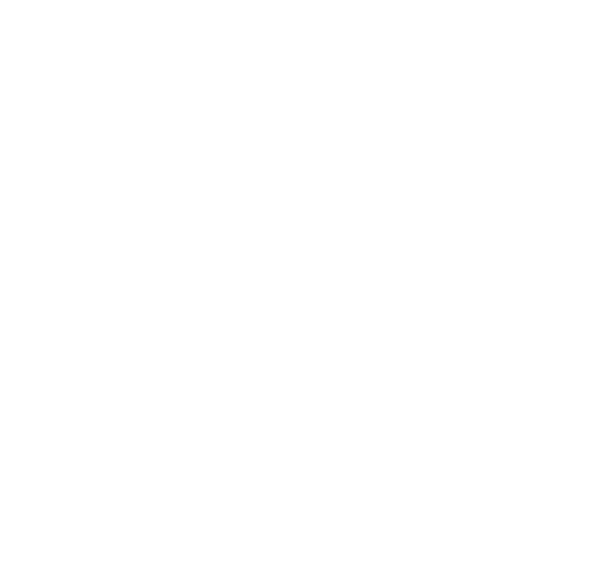

In [ ]:
h_gnn = {mx : {} for mx in MX}
limit_gnn = {mx : {} for mx in MX}
limit_my_gnn = {my : {} for my in MY}

for mx in gnn_n.keys():
    for my in gnn_n[mx]:
        print(mx, my)
        v = gnn_n[mx][my]
        # print(gnn_n[mx][my])
        try: del canvas, ROOT_hist
        except: pass
        filename = f"{model_savein}/root_files/n_asr_{mx}_{my}.root"
        fout = ROOT.TFile(filename,"recreate")
        fout.cd()

        canvas = ROOT.TCanvas('c1','c1', 600, 600)
        canvas.SetFrameLineWidth(3)
        canvas.Draw()

        h_title = f"signal"
        ROOT_hist = ROOT.TH1D(h_title,";m_{X} [GeV];Events",nbins-1,array('d',list(data.mBins)))
        for i,(val) in enumerate(v):
            ROOT_hist.SetBinContent(i+1, val) 

        ROOT_hist.Draw("hist")
        ROOT_hist.Write()
        fout.Close()

        h_gnn[mx][my] = up.open(filename)['signal']
        norm, w, data, obs_limit, exp_limit = get_stats(h_data_gnn, h_gnn[mx][my])
        limit_gnn[mx][my] = np.array(exp_limit)*300
        limit_my_gnn[my][mx] = np.array(exp_limit)*300


In [ ]:
limit_my_gnn = {my:{} for my in MY}

for mx in limit_gnn.keys():
    for my in limit_gnn[mx].keys():
        limit_my_gnn[my][mx] = limit_gnn[mx][my]

limit_my_gnn

{250: {400: array([ 32.1944003 ,  34.16174588,  56.98709506,  82.29382937,
         120.12147015]),
  450: array([22.84591113, 26.89208139, 38.33883613, 54.24479365, 75.96014074]),
  500: array([14.20591259, 18.51708363, 25.52138902, 36.30060011, 49.21482714]),
  550: array([12.37255621, 16.38447871, 22.19325169, 31.0764636 , 42.35455955]),
  600: array([12.31076878, 16.38713867, 22.46692848, 31.48466622, 42.47373397]),
  650: array([12.74080195, 17.22245548, 23.8380626 , 33.14520527, 44.59425605]),
  700: array([11.27616977, 15.20506768, 21.05428684, 29.27247858, 39.44816336]),
  800: array([10.14611492, 13.36404163, 18.5971363 , 26.06572772, 35.07206557]),
  850: array([ 9.17884736, 12.13198735, 16.81968533, 23.36817984, 31.60178654]),
  900: array([ 9.1280402 , 12.0821523 , 16.70912192, 23.09827576, 31.27724009]),
  1000: array([ 9.21465815, 12.25471109, 16.8144943 , 23.51112116, 31.68653252]),
  1100: array([10.39096341, 13.86126434, 18.91600573, 26.65000203, 35.92894488]),
  1200:

/tmp/ipykernel_16005/123726452.py:8: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  limits = np.column_stack((v for v in limit_my_gnn[my].values()))


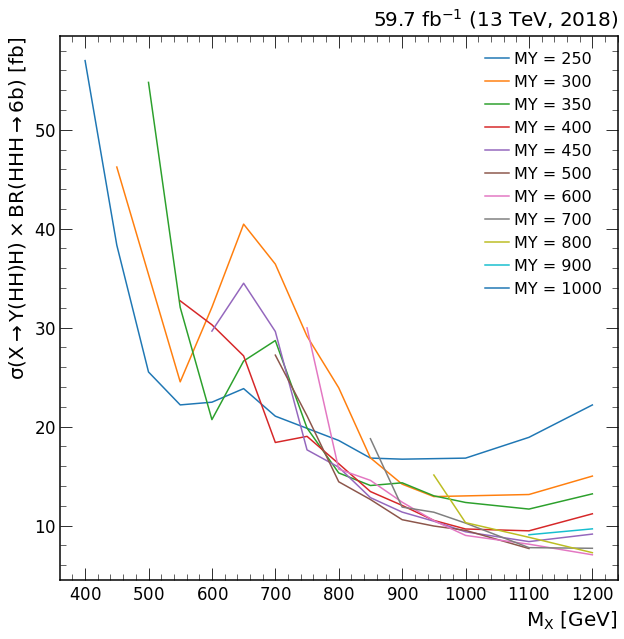

In [ ]:
fig, ax = plt.subplots()

for my in limit_my_gnn.keys():
    # if my == 250: continue
    # print([mx for mx in limit_my_gnn[my].keys()])
    x = [mx for mx in limit_my_gnn[my].keys()]
    # print(np.column_stack((v for v in limit_my_gnn[my].values())))
    limits = np.column_stack((v for v in limit_my_gnn[my].values()))
    
    # ax.fill_between(x, limits[0,:], limits[1,:], color='gold')
    # ax.fill_between(x, limits[1,:], limits[3,:], color='mediumseagreen')
    # ax.fill_between(x, limits[3,:], limits[4,:], color='gold')
    ax.plot(x, limits[2,:], label=f'MY = {my}')
    # break

ax.legend()
ax.set_ylabel(r"$\sigma(X\rightarrow Y(HH)H) \times BR(HHH\rightarrow6b)$ [fb]")
ax.set_xlabel(r"$M_X$ [GeV]")
ax.set_title(data.sample)

# ax.text(0.5,0.75,'GNN Method',transform=ax.transAxes,ha='center')

fig.savefig(f'{model_savein}/gnn_limits.pdf')

In [ ]:
limit_my_gnn

{250: {400: array([ 32.1944003 ,  34.16174588,  56.98709506,  82.29382937,
         120.12147015]),
  450: array([22.84591113, 26.89208139, 38.33883613, 54.24479365, 75.96014074]),
  500: array([14.20591259, 18.51708363, 25.52138902, 36.30060011, 49.21482714]),
  550: array([12.37255621, 16.38447871, 22.19325169, 31.0764636 , 42.35455955]),
  600: array([12.31076878, 16.38713867, 22.46692848, 31.48466622, 42.47373397]),
  650: array([12.74080195, 17.22245548, 23.8380626 , 33.14520527, 44.59425605]),
  700: array([11.27616977, 15.20506768, 21.05428684, 29.27247858, 39.44816336]),
  800: array([10.14611492, 13.36404163, 18.5971363 , 26.06572772, 35.07206557]),
  850: array([ 9.17884736, 12.13198735, 16.81968533, 23.36817984, 31.60178654]),
  900: array([ 9.1280402 , 12.0821523 , 16.70912192, 23.09827576, 31.27724009]),
  1000: array([ 9.21465815, 12.25471109, 16.8144943 , 23.51112116, 31.68653252]),
  1100: array([10.39096341, 13.86126434, 18.91600573, 26.65000203, 35.92894488]),
  1200:

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(limit_gnn)
df.to_csv(f'{model_savein}/gnn_limits.csv')

In [ ]:
test_df = pd.read_csv(f'{model_savein}/gnn_limits.csv')

In [ ]:
test_df

,Unnamed: 0,400,450,500,550,600,650,700,750,800,850,900,950,1000,1100,1200
0,250,[ 29.66277067 40.05358811 55.21087569 81.42...,[22.01842609 29.32509762 39.86715466 55.843978...,[16.01263367 20.92763235 28.77919034 40.118741...,[13.13784359 17.56576805 24.62932823 34.243633...,[12.92290591 17.11203656 23.6518802 32.727458...,[12.91569002 17.53680862 24.26052832 33.749577...,[11.57909594 15.75100353 21.77580029 30.305475...,NaN,[ 9.80696103 12.93234052 17.97345286 25.088695...,[ 8.74349073 11.6033375 15.99321915 22.247243...,[ 8.69798009 11.56831208 15.88173226 22.210259...,NaN,[ 8.92116078 11.90468197 16.26943122 22.902261...,[10.55002205 14.0555333 19.22502217 26.999663...,[11.94405854 15.99705798 22.57273504 31.332691...
1,300,NaN,[23.97196515 32.61578934 44.55659314 61.585551...,NaN,[14.43254545 19.32048125 26.56128528 37.209864...,[18.29607552 24.13568411 33.57119678 47.135622...,[23.21933077 31.05700432 42.92237875 59.839859...,[21.06860721 28.29399202 38.97172763 54.516313...,[16.35326583 21.63403164 30.08674193 41.994904...,[12.2285367 16.4774938 22.82823547 31.763030...,[ 8.6072451 11.37454962 15.77363084 21.926593...,[ 7.34423819 9.72935993 13.44050494 18.617843...,[ 6.8874345 9.13014632 12.59736797 17.477033...,NaN,[ 7.09138665 9.42334353 12.94852916 18.069828...,[ 7.9189395 10.64967852 14.81882228 20.527287...
2,350,NaN,NaN,[ 30.6162518 41.00270813 57.83662985 80.41...,[18.95171962 25.26877821 34.52939872 48.589280...,[11.70239336 15.4531962 21.45065369 29.876760...,[15.74454839 20.80918426 28.96983549 40.403729...,[16.04443318 21.39855537 29.64516644 41.223669...,[10.22247357 13.82530915 19.102926 26.600607...,[ 7.84815802 10.34215251 14.38993491 20.180098...,[ 7.05805618 9.32878874 12.94356397 18.005106...,[ 7.08095398 9.36648099 12.96783782 17.963566...,[ 6.6470633 8.79895887 12.16760843 16.823648...,[ 6.31261767 8.36218469 11.55198538 15.999545...,[ 6.1346393 8.1368529 11.21518112 15.580650...,[ 6.95095552 9.28707594 12.7054058 17.867796...
3,400,NaN,NaN,NaN,[19.53119213 26.037007 35.5884005 50.057993...,[17.73030567 23.41926247 32.52943518 45.672144...,[15.69759924 20.68865219 28.91718567 40.261895...,[10.49034697 13.93188593 19.25766114 26.931049...,[10.33701052 13.85968492 19.12597403 26.628409...,[ 8.20008612 10.87560127 15.09104938 21.106818...,[ 6.76396788 8.93872153 12.3948016 17.226674...,[ 6.21610396 8.22984407 11.3800674 15.741050...,[ 5.49916979 7.29226264 10.05727702 13.964322...,[ 4.99311091 6.62540969 9.12895133 12.694799...,[ 5.06315292 6.71826571 9.25444012 12.868761...,[ 5.71655249 7.6507505 10.51178776 14.731470...
4,450,NaN,NaN,NaN,NaN,[16.7099374 22.00119179 30.64624951 42.954739...,[19.69332155 26.1152366 36.34223092 50.455469...,[17.16300527 22.9574764 31.72705131 44.233579...,[ 9.5549026 12.89660011 17.81492684 24.807630...,[ 8.00716072 10.64972846 14.77314758 20.616355...,[ 6.51478536 8.61804769 11.93491952 16.544003...,[ 5.79114639 7.67921605 10.59362062 14.707828...,[ 5.46347717 7.25182878 9.98635987 13.897641...,[ 4.86763291 6.47670912 8.88265497 12.435509...,[ 4.57132407 6.08281049 8.34699441 11.677457...,[ 4.83411554 6.48863821 8.98294814 12.504127...
5,500,NaN,NaN,NaN,NaN,NaN,NaN,[15.73056616 20.90696026 29.0464976 40.298353...,[11.50586062 15.44631066 21.31947332 29.683289...,[ 7.31363966 9.62461395 13.40905996 18.797650...,[ 6.37272913 8.43555097 11.67114345 16.145311...,[ 5.40294864 7.17217088 9.87758319 13.749472...,[ 5.14001739 6.82740321 9.39039745 13.091123...,[ 4.92476785 6.5487487 8.99034641 12.567527...,[ 4.22206244 5.6151039 7.70452859 10.773591...,NaN
6,600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[16.10941352 21.31305693 29.63530361 41.364609...,[ 7.95401504 10.47584804 14.58205195 20.412222...,[ 7.33230225 9.70637149 13.44343871 18.632179...,[ 6.31619979 8.37161505 11.55567684 16.026074...,[ 5.4795562 7.27733753 10.0223963 13.954922...,[ 4.7074137 6.25826057 8.59511044 12.007927...,[ 4.49611661 5.98231321 8.20215962 11.482257...,[ 3.9820993 5.36981784 7.55404733 10.473669...
7,700,

In [ ]:
my = 250

x_gnn = []
y_gnn = []
for mx in limit_my_gnn[my].keys():
    x_gnn.append(mx)
    y_gnn.append(limit_my_gnn[my][mx][2])

x_nonML = []
y_nonML = []
for mx in limit_my_nonML[my].keys():
    x_nonML.append(mx)
    y_nonML.append(limit_my_nonML[my][mx][2])

fig, ax = plt.subplots()

ax.plot(x_gnn,y_gnn)
ax.plot(x_nonML,y_nonML)

NameError: name 'limit_my_nonML' is not defined

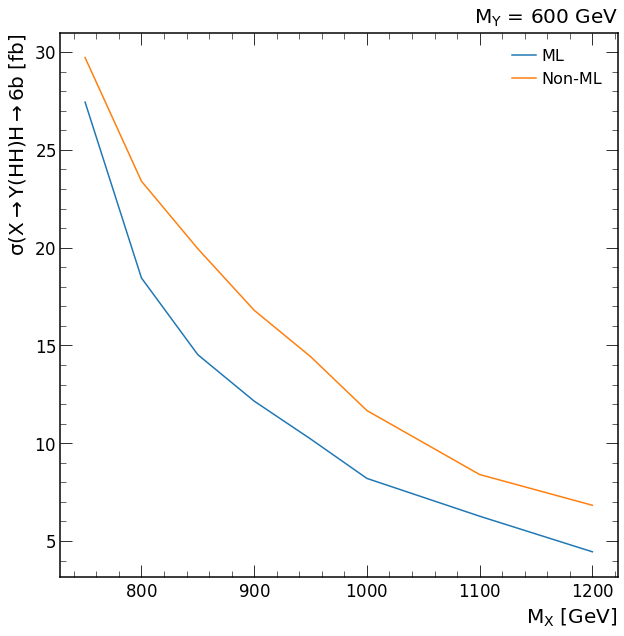

In [ ]:
my = 600

x_gnn = []
y_gnn = []
for mx in limit_my_gnn[my].keys():
    x_gnn.append(mx)
    y_gnn.append(limit_my_gnn[my][mx][2])

x_nonML = []
y_nonML = []
for mx in limit_my_nonML[my].keys():
    x_nonML.append(mx)
    y_nonML.append(limit_my_nonML[my][mx][2])

fig, ax = plt.subplots()

ax.plot(x_gnn,y_gnn, label='ML')
ax.plot(x_nonML,y_nonML, label='Non-ML')

ax.set_xlabel(r'$M_X$ [GeV]')
ax.set_ylabel(r"$\sigma(X\rightarrow Y(HH)H \rightarrow 6b$ [fb]")
ax.legend()
ax.set_title(r'$M_Y$ = 600 GeV')

fig.savefig(f'{model_savein}/gnn_vs_nonML.pdf')

In [ ]:
model_savein

'plots/limit_plots/gnn/feynnet/20230414_ranger_lr0.0047_batch1024__13_mass_points_100_epochs_withbkg'

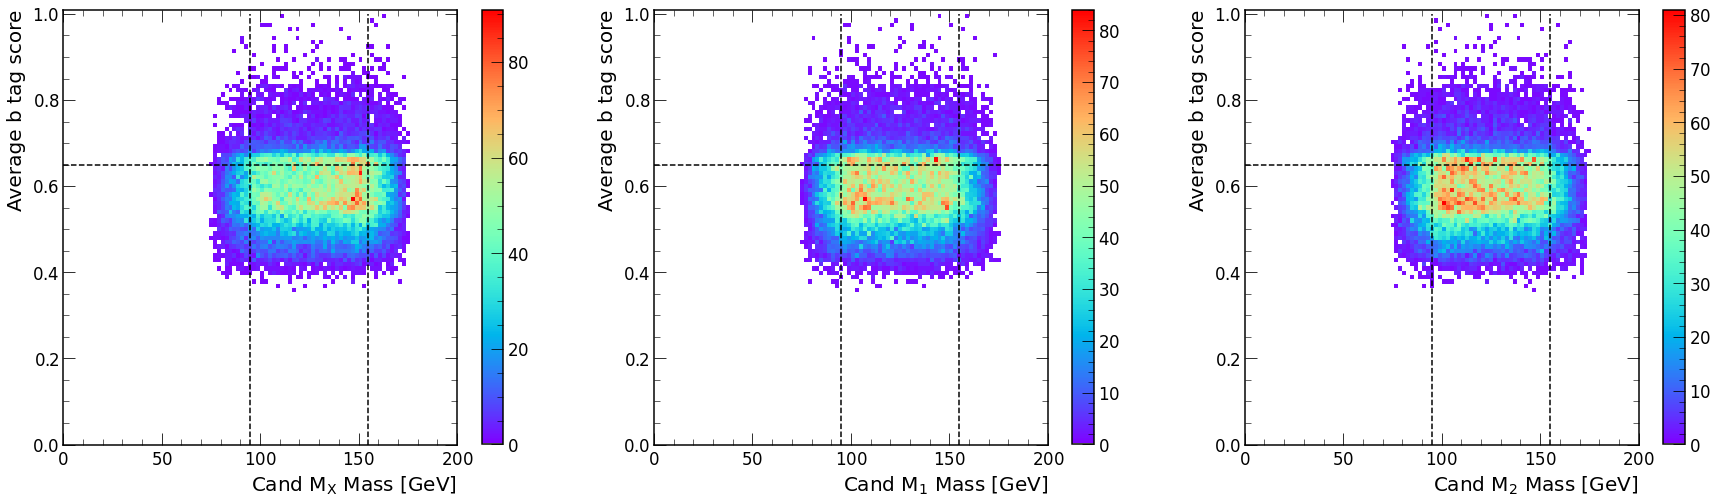

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(30,8))

n, xe, ye, imx = Hist2d(bias_data.HX.m[bias_data.acr_mask], bias_data.btag_avg[bias_data.acr_mask], bins=[np.linspace(0,200,101),np.linspace(0,1.01,101)], ax=axs[0])
n, xe, ye, im1 = Hist2d(bias_data.H1.m[bias_data.acr_mask], bias_data.btag_avg[bias_data.acr_mask], bins=[np.linspace(0,200,101),np.linspace(0,1.01,101)], ax=axs[1])
n, xe, ye, im2 = Hist2d(bias_data.H2.m[bias_data.acr_mask], bias_data.btag_avg[bias_data.acr_mask], bins=[np.linspace(0,200,101),np.linspace(0,1.01,101)], ax=axs[2])

fig.colorbar(imx, ax=axs[0])
fig.colorbar(im1, ax=axs[1])
fig.colorbar(im2, ax=axs[2])
# axs[0].set_title('Average DeepJet score and H cand mass for signal in SR')

for ax in axs.flatten():
    ax.plot([0,300],[0.65,0.65],'--',color='k')
    ax.plot([95,95],[0,1],'--',color='k')
    ax.plot([155,155],[0,1],'--',color='k')
    ax.set_ylabel('Average b tag score')

axs[0].set_xlabel(r'Cand $M_X$ Mass [GeV]')
axs[1].set_xlabel(r'Cand $M_1$ Mass [GeV]')
axs[2].set_xlabel(r'Cand $M_2$ Mass [GeV]')

fig.savefig('plots/gnn/feynnet/mh_v_avgbtag_mcbkg_nonML.pdf')

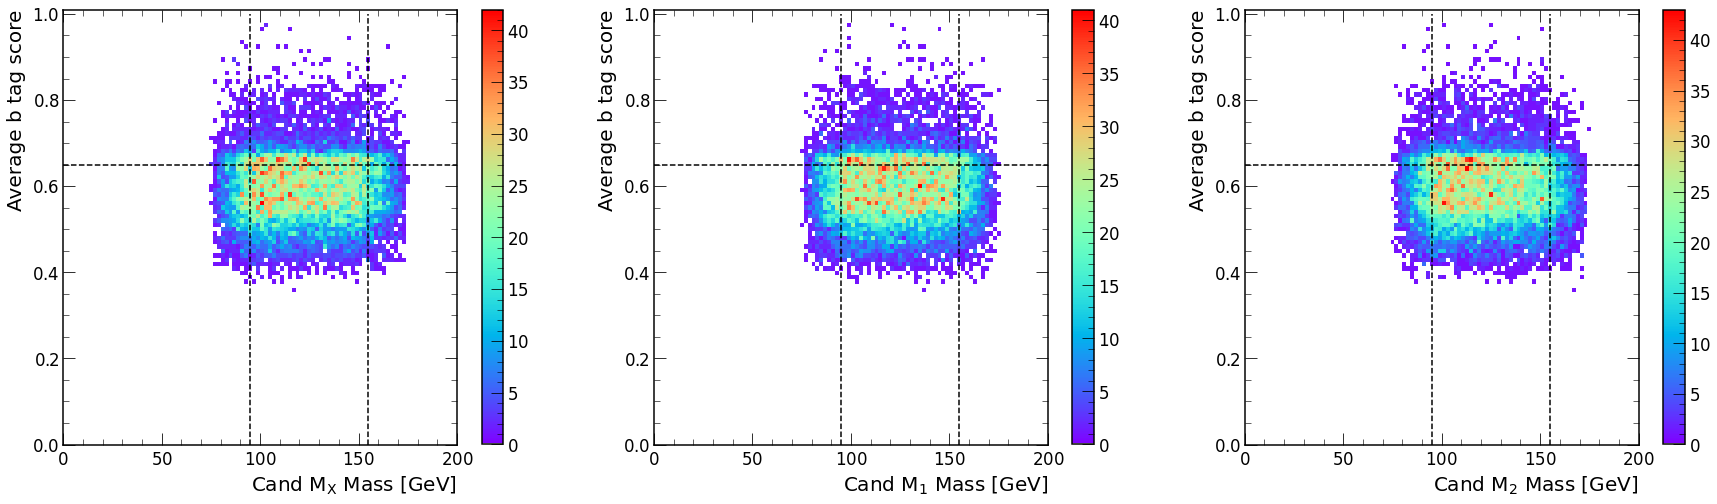

In [ ]:
fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(30,8))

n, xe, ye, imx = Hist2d(data.HX.m[data.acr_mask], data.btag_avg[data.acr_mask], bins=[np.linspace(0,200,101),np.linspace(0,1.01,101)], ax=axs[0])
n, xe, ye, im1 = Hist2d(data.H1.m[data.acr_mask], data.btag_avg[data.acr_mask], bins=[np.linspace(0,200,101),np.linspace(0,1.01,101)], ax=axs[1])
n, xe, ye, im2 = Hist2d(data.H2.m[data.acr_mask], data.btag_avg[data.acr_mask], bins=[np.linspace(0,200,101),np.linspace(0,1.01,101)], ax=axs[2])

fig.colorbar(imx, ax=axs[0])
fig.colorbar(im1, ax=axs[1])
fig.colorbar(im2, ax=axs[2])
# axs[0].set_title('Average DeepJet score and H cand mass for signal in SR')

for ax in axs.flatten():
    ax.plot([0,300],[0.65,0.65],'--',color='k')
    ax.plot([95,95],[0,1],'--',color='k')
    ax.plot([155,155],[0,1],'--',color='k')
    ax.set_ylabel('Average b tag score')

axs[0].set_xlabel(r'Cand $M_X$ Mass [GeV]')
axs[1].set_xlabel(r'Cand $M_1$ Mass [GeV]')
axs[2].set_xlabel(r'Cand $M_2$ Mass [GeV]')

fig.savefig('plots/gnn/feynnet/mh_v_avgbtag_data_acr.pdf')

In [ ]:
x = np.linspace(-100,500,1000)
f = 1-np.exp(-(x-125)**2/(2*25**2))

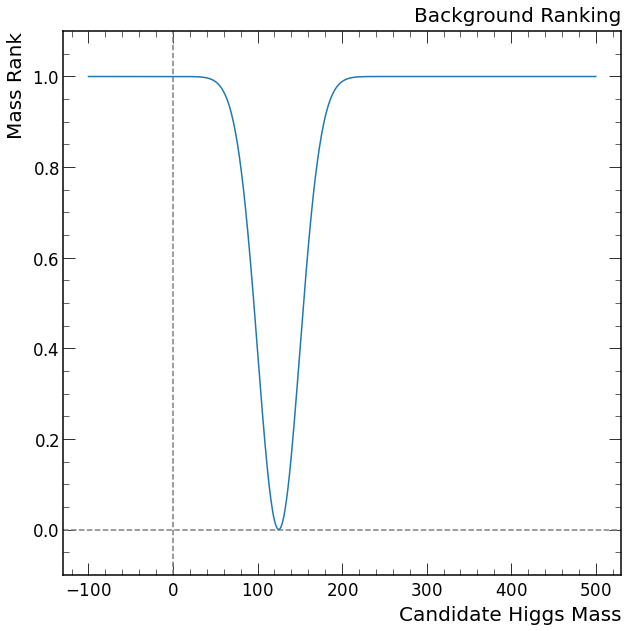

In [ ]:
fig, ax = plt.subplots()

ax.axhline(0, color='gray', linestyle='--')
ax.axvline(0, color='gray', linestyle='--')
ax.plot(x, f)

ax.set_ylim(-0.1,1.1)

ax.set_title('Background Ranking')
ax.set_xlabel('Candidate Higgs Mass')
ax.set_ylabel('Mass Rank')

fig.savefig('plots/gnn/feynnet/bkg_mass_rank.pdf')

In [ ]:
from matplotlib.colors import BoundaryNorm
from matplotlib.patches import Circle

In [ ]:
# norm = BoundaryNorm(boundaries=np.array())

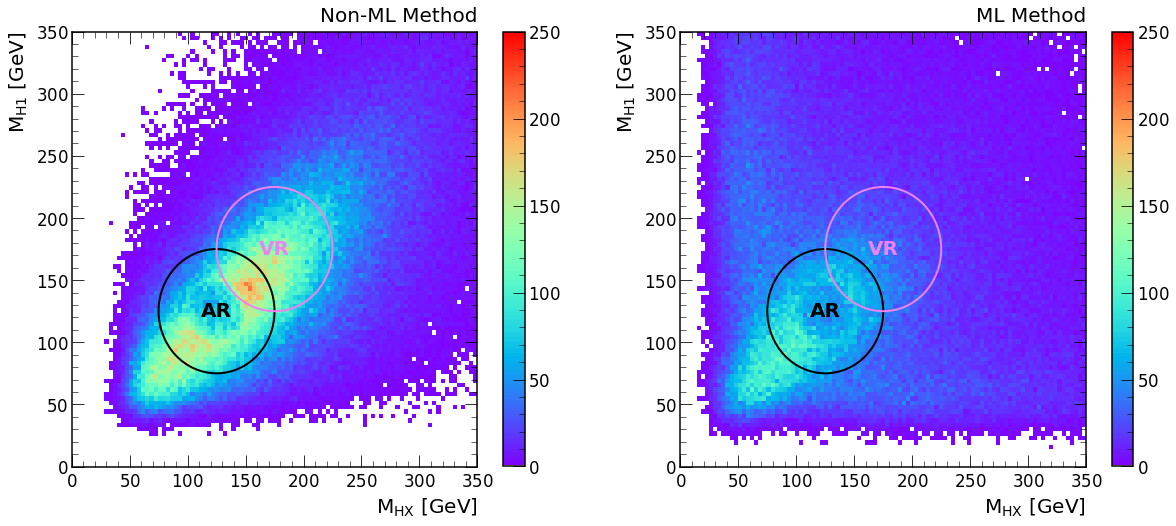

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

ar_color = 'black'
vr_color = 'violet'

circle1 = Circle((125,125), radius=50, color=ar_color, fill=False, lw=2)
circle3 = Circle((175,175), radius=50, color=vr_color, fill=False, lw=2)

n, ex, ey, im = Hist2d(bias_data.HX.m[~bias_data.asr_mask], bias_data.H1.m[~bias_data.asr_mask], bins=np.linspace(0,350,100), ax=axs[0], vmax=250)
fig.colorbar(im, ax=axs[0])
axs[0].set_title('Non-ML Method')
axs[0].add_artist(circle1)
axs[0].add_artist(circle3)
axs[0].text(125,125,'AR',color=ar_color, ha='center', va='center', weight='bold')
axs[0].text(175,175,'VR',color=vr_color, ha='center', va='center', weight='bold')

circle2 = Circle((125,125), radius=50, color=ar_color, fill=False, lw=2)
circle4 = Circle((175,175), radius=50, color=vr_color, fill=False, lw=2)

n, ex, ey, im = Hist2d(data.HX.m[~data.asr_mask], data.H1.m[~data.asr_mask], bins=np.linspace(0,350,100), ax=axs[1], vmax=250)
fig.colorbar(im, ax=axs[1])
axs[1].set_title('ML Method')
axs[1].add_artist(circle2)
axs[1].add_artist(circle4)
axs[1].text(125,125,'AR',color=ar_color, ha='center', va='center', weight='bold')
axs[1].text(175,175,'VR',color=vr_color, ha='center', va='center', weight='bold')

for ax in axs.flatten():
    ax.set_xlabel(r'$M_{HX}$ [GeV]')
    ax.set_ylabel(r'$M_{H1}$ [GeV]')

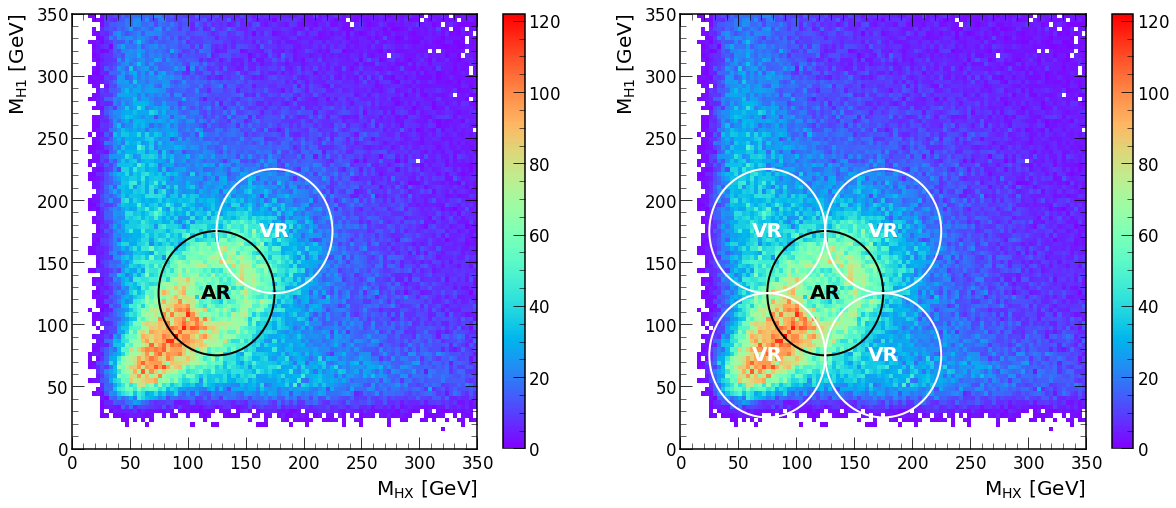

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

ar_color = 'black'
vr_color = 'white'

circle1 = Circle((125,125), radius=50, color=ar_color, fill=False, lw=2)
circle3 = Circle((175,175), radius=50, color=vr_color, fill=False, lw=2)

n, ex, ey, im = Hist2d(data.HX.m[~data.asr_mask], data.H1.m[~data.asr_mask], bins=np.linspace(0,350,100), ax=axs[0])#, vmax=250)
fig.colorbar(im, ax=axs[0])
# axs[0].set_title('Non-ML Method')
axs[0].add_artist(circle1)
axs[0].add_artist(circle3)
axs[0].text(125,125,'AR',color=ar_color, ha='center', va='center', weight='bold')
axs[0].text(175,175,'VR',color=vr_color, ha='center', va='center', weight='bold')

circle2 = Circle((125,125), radius=50, color=ar_color, fill=False, lw=2)
circle4 = Circle((175,175), radius=50, color=vr_color, fill=False, lw=2)
circle5 = Circle((75,75), radius=50, color=vr_color, fill=False, lw=2)
circle6 = Circle((175,75), radius=50, color=vr_color, fill=False, lw=2)
circle7 = Circle((75,175), radius=50, color=vr_color, fill=False, lw=2)

n, ex, ey, im = Hist2d(data.HX.m[~data.asr_mask], data.H1.m[~data.asr_mask], bins=np.linspace(0,350,100), ax=axs[1])#, vmax=250)
fig.colorbar(im, ax=axs[1])
# axs[1].set_title('ML Method')
axs[1].add_artist(circle2)
axs[1].add_artist(circle4)
axs[1].add_artist(circle5)
axs[1].add_artist(circle6)
axs[1].add_artist(circle7)
axs[1].text(125,125,'AR',color=ar_color, ha='center', va='center', weight='bold')
axs[1].text(175,175,'VR',color=vr_color, ha='center', va='center', weight='bold')
axs[1].text(75,75,'VR',color=vr_color, ha='center', va='center', weight='bold')
axs[1].text(175,75,'VR',color=vr_color, ha='center', va='center', weight='bold')
axs[1].text(75,175,'VR',color=vr_color, ha='center', va='center', weight='bold')

for ax in axs.flatten():
    ax.set_xlabel(r'$M_{HX}$ [GeV]')
    ax.set_ylabel(r'$M_{H1}$ [GeV]')

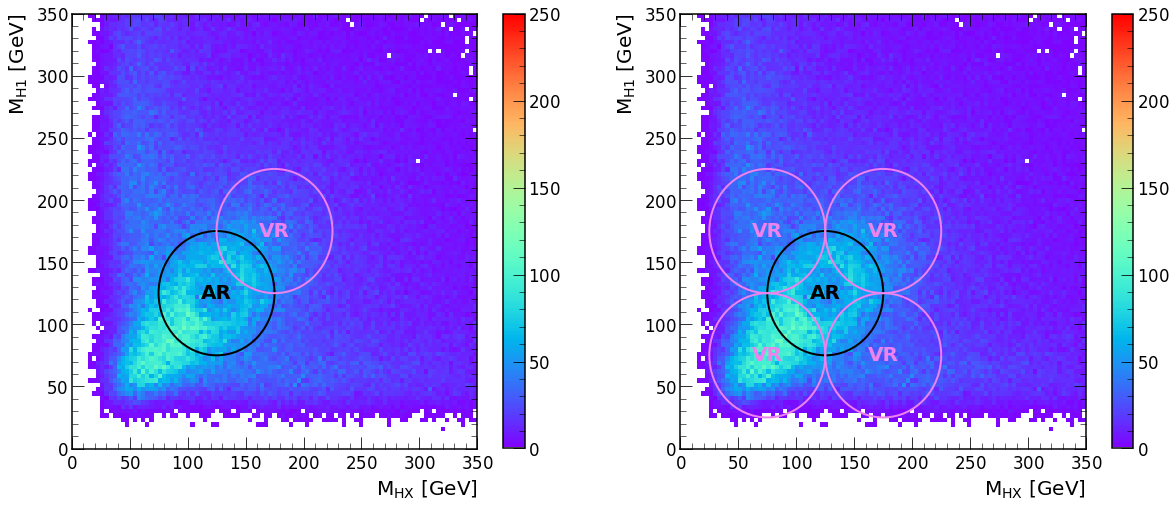

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,8))

ar_color = 'black'
vr_color = 'violet'

circle1 = Circle((125,125), radius=50, color=ar_color, fill=False, lw=2)
circle3 = Circle((175,175), radius=50, color=vr_color, fill=False, lw=2)

n, ex, ey, im = Hist2d(data.HX.m[~data.asr_mask], data.H1.m[~data.asr_mask], bins=np.linspace(0,350,100), ax=axs[0], vmax=250)
fig.colorbar(im, ax=axs[0])
# axs[0].set_title('Non-ML Method')
axs[0].add_artist(circle1)
axs[0].add_artist(circle3)
axs[0].text(125,125,'AR',color=ar_color, ha='center', va='center', weight='bold')
axs[0].text(175,175,'VR',color=vr_color, ha='center', va='center', weight='bold')

circle2 = Circle((125,125), radius=50, color=ar_color, fill=False, lw=2)
circle4 = Circle((175,175), radius=50, color=vr_color, fill=False, lw=2)
circle5 = Circle((75,75), radius=50, color=vr_color, fill=False, lw=2)
circle6 = Circle((175,75), radius=50, color=vr_color, fill=False, lw=2)
circle7 = Circle((75,175), radius=50, color=vr_color, fill=False, lw=2)

n, ex, ey, im = Hist2d(data.HX.m[~data.asr_mask], data.H1.m[~data.asr_mask], bins=np.linspace(0,350,100), ax=axs[1], vmax=250)
fig.colorbar(im, ax=axs[1])
# axs[1].set_title('ML Method')
axs[1].add_artist(circle2)
axs[1].add_artist(circle4)
axs[1].add_artist(circle5)
axs[1].add_artist(circle6)
axs[1].add_artist(circle7)
axs[1].text(125,125,'AR',color=ar_color, ha='center', va='center', weight='bold')
axs[1].text(175,175,'VR',color=vr_color, ha='center', va='center', weight='bold')
axs[1].text(75,75,'VR',color=vr_color, ha='center', va='center', weight='bold')
axs[1].text(175,75,'VR',color=vr_color, ha='center', va='center', weight='bold')
axs[1].text(75,175,'VR',color=vr_color, ha='center', va='center', weight='bold')

for ax in axs.flatten():
    ax.set_xlabel(r'$M_{HX}$ [GeV]')
    ax.set_ylabel(r'$M_{H1}$ [GeV]')